# Analysing Node21 for GAN Experimentation

Given our goal is to create a GAN to generate pseudo-healthy CXR halves, we will need both a diverse range of healthy images, but also annotated samples of unhealthy images to determine the reliability of this approach. This notebook aims to summarise the distributions of the Node21 dataset.

# Process Metadata

In [255]:
import pandas as pd
import seaborn as sns
import numpy as np

In [256]:
data_name_mapping_df = pd.read_csv("/Volumes/Sophie H/dataset_node21/cxr_images/original_data/filenames_orig_and_new.csv")
data_meta_df = pd.read_csv("/Volumes/Sophie H/dataset_node21/cxr_images/original_data/metadata.csv")
data_proc_meta_df = pd.read_csv("/Volumes/Sophie H/dataset_node21/cxr_images/proccessed_data/metadata.csv")
data_sim_proc_meta_df = pd.read_csv("/Volumes/Sophie H/dataset_node21/cxr_images/proccessed_data/simulated_metadata.csv")
# https://grand-challenge.org/forums/forum/node21-577/topic/is-there-a-way-to-distinguish-the-source-of-the-data-166/
# Authors shared non-nodule information separately
non_nodule_mapping = pd.read_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/non_nodule_filenames_orig_and_new.csv")

Check Sizes of Dataframes 

In [257]:
print("Number of files in `data_name_mapping_df`: {}\n".format(len(data_name_mapping_df)))
print("Number of files in `non_nodule_mapping`: {}\n".format(len(non_nodule_mapping)))
print("Number of files in `data_meta_df`: {}\n".format(len(data_meta_df)))
print("Number of files in `data_proc_meta_df`: {}\n".format(len(data_proc_meta_df)))
print("Number of files in `data_sim_proc_meta_df`: {}\n".format(len(data_sim_proc_meta_df)))

Number of files in `data_name_mapping_df`: 1134

Number of files in `non_nodule_mapping`: 3748

Number of files in `data_meta_df`: 5224

Number of files in `data_proc_meta_df`: 5224

Number of files in `data_sim_proc_meta_df`: 7576



In [258]:
1134+3748

4882

In [259]:
print("Node21 Non-Nodule Images\n\n\
Dataset    Expected   Actual \n\
----------------------------\n\
JSRT     | 93       | {}\n\
OpenI    | 1102     | {}\n\
CXR14    | 1187     | {}\n\
PadChest | 1366     | {}\n".format(
    non_nodule_mapping.orig_dataset.value_counts()['jsrt'],
    non_nodule_mapping.orig_dataset.value_counts()['openi'],
    non_nodule_mapping.orig_dataset.value_counts()['chestxray14'],
    non_nodule_mapping.orig_dataset.value_counts()['padchest']))

Node21 Non-Nodule Images

Dataset    Expected   Actual 
----------------------------
JSRT     | 93       | 93
OpenI    | 1102     | 1102
CXR14    | 1187     | 1187
PadChest | 1366     | 1366



Peep at imported DFs to understand structure and content

In [260]:
# data_name_mapping_df['mha'] = data_name_mapping_df.node21_img_id.apply(lambda x: x+".mha")
data_name_mapping_df.head()

,original_image_name,orig_dataset,node21_img_id
0,00010496_001,chestxray14,n0239
1,00006281_000,chestxray14,n0342
2,00001404_000,chestxray14,n0996
3,00029196_000,chestxray14,n0418
4,00014646_003,chestxray14,n0538


In [261]:
data_meta_df.head()

,Unnamed: 0,height,img_name,label,width,x,y
0,0,94,n0239.mha,1,92,776,538
1,1,40,n0342.mha,1,27,215,641
2,2,108,n0996.mha,1,155,695,342
3,3,75,n0418.mha,1,72,319,447
4,4,69,n0538.mha,1,62,599,590


In [262]:
data_proc_meta_df.head()

,Unnamed: 0,height,img_name,label,width,x,y
0,0,94,n0239.mha,1,92,776,579
1,1,40,n0342.mha,1,27,223,642
2,2,111,n0996.mha,1,159,687,310
3,3,84,n0418.mha,1,81,343,510
4,4,69,n0538.mha,1,62,599,645


In [263]:
data_sim_proc_meta_df.head()

,Unnamed: 0,height,img_name,width,x,y
0,0,64,c0001.mha,64,625,380
1,1,164,c0013.mha,164,727,699
2,2,64,c0013.mha,64,184,661
3,3,40,c0013.mha,40,242,273
4,4,82,c0017.mha,82,381,669


In [264]:
non_nodule_mapping.head()

,original_image_name,orig_dataset,node21_img_id
0,00001534_003,chestxray14,c0001
1,31177334937020045310945773597539793496_nex9f9,padchest,c0002
2,320480257105552742854174325138806946204_4hrl5r,padchest,c0003
3,595_IM-2187-1001,openi,c0004
4,212771334048726755265128035251611120103_2_s1v6ff,padchest,c0005


##### Combine Mapping DFs
Since the initial competition filename mapping CSV only described *nodule* CXR images, the authors later shared the remaining file mappings via the competition forums. We will concatenate the two files to make our data processing less complicated.

In [265]:
# assign positive samples label of 1, negatives 0
data_name_mapping_df['label'] = 1
non_nodule_mapping['label'] = 0
# concat to create new df of all mapping information
name_mapping_df = pd.concat([data_name_mapping_df,non_nodule_mapping], ignore_index=True)
print("Expected Rows: 4882 | Actual Rows: {}".format(len(name_mapping_df)))
name_mapping_df.head()

Expected Rows: 4882 | Actual Rows: 4882


,original_image_name,orig_dataset,node21_img_id,label
0,00010496_001,chestxray14,n0239,1
1,00006281_000,chestxray14,n0342,1
2,00001404_000,chestxray14,n0996,1
3,00029196_000,chestxray14,n0418,1
4,00014646_003,chestxray14,n0538,1


In [266]:
# add '.mha' to make matching mapping for existing files
name_mapping_df['mha'] = name_mapping_df['node21_img_id'].apply(lambda x: x+".mha")

In [267]:
# join original image names to metadata file 
# data_combined = name_mapping_df.merge(
#     we only want certain columns                     rename to consistent format for cleaner merges
    # data_meta_df[['img_name','height','width','x','y']].rename(columns={'img_name': 'mha'}), 
    # on = 'mha', how='left')
#    Single images can have multiple bounding boxes; currently we only want single file information, so to prevent redundant duplicate filenames, exclude in merge 
# !!! Currently not required - bboxes make duplicate rows
# peek to ensure it looks ok
data_combined = name_mapping_df[['original_image_name', 'orig_dataset', 'label', 'mha']]
data_combined.head(3)

,original_image_name,orig_dataset,label,mha
0,00010496_001,chestxray14,1,n0239.mha
1,00006281_000,chestxray14,1,n0342.mha
2,00001404_000,chestxray14,1,n0996.mha


In [268]:
len(name_mapping_df)

4882

In [269]:
len(data_combined)

4882

## Fetch data source metafiles 

### CXR8
Each dataset has differing source files, and will need to be combined manually. CXR8/CXR14

In [270]:
cxr8_meta_df  = pd.read_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/CXR_8_meta.csv")
cxr8_meta_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [271]:
# re-format the file naming convention to match target
cxr8_meta_df['match_name'] = cxr8_meta_df['Image Index'].apply(lambda x: x.split(".")[0])

In [272]:
data_combined.head(1)

,original_image_name,orig_dataset,label,mha
0,00010496_001,chestxray14,1,n0239.mha


*Combine master mapping file with CXR8 data*

In [273]:
data_combined.query("orig_dataset == 'chestxray14'")

,original_image_name,orig_dataset,label,mha
0,00010496_001,chestxray14,1,n0239.mha
1,00006281_000,chestxray14,1,n0342.mha
2,00001404_000,chestxray14,1,n0996.mha
3,00029196_000,chestxray14,1,n0418.mha
4,00014646_003,chestxray14,1,n0538.mha
...,...,...,...,...
4869,00000041_003,chestxray14,0,c3883.mha
4870,00001211_000,chestxray14,0,c3884.mha
4871,00000944_000,chestxray14,0,c3885.mha
4875,00000177_003,chestxray14,0,c3889.mha


In [274]:
data_combined.head()


,original_image_name,orig_dataset,label,mha
0,00010496_001,chestxray14,1,n0239.mha
1,00006281_000,chestxray14,1,n0342.mha
2,00001404_000,chestxray14,1,n0996.mha
3,00029196_000,chestxray14,1,n0418.mha
4,00014646_003,chestxray14,1,n0538.mha


In [275]:
cxr8_meta_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],match_name
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,00000001_000
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,00000001_001
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,00000001_002
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,00000002_000
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,00000003_001
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168,00030801_001
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168,00030802_000
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,00030803_000
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168,00030804_000


In [276]:
cxr14_merged_df = data_combined.query("orig_dataset == 'chestxray14'").merge(
    cxr8_meta_df[['match_name','Finding Labels', 'Patient ID', 'Patient Age','Patient Gender','OriginalImage[Width', 'Height]']].rename(
        columns={'OriginalImage[Width':"original_image_width","Height]":"original_image_height"}), right_on='match_name', 
    left_on = 'original_image_name', how='left')
cxr14_merged_df.drop('match_name', axis=1, inplace=True)

In [277]:
cxr14_merged_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44,M,2992,2991
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46,F,2500,2048
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47,M,2048,2500
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48,F,2021,2021
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55,M,2992,2991


In [278]:
len(data_combined.query("orig_dataset == 'chestxray14'"))

1804

In [279]:
len(cxr14_merged_df)

1804

In [280]:
# CXR14 distribution of findings
cxr14_merged_df.query("orig_dataset == 'chestxray14'")['Finding Labels'].value_counts()

Finding Labels
No Finding             1187
Nodule                  591
Nodule|Pneumothorax      20
Cardiomegaly|Nodule       6
Name: count, dtype: int64

With this additional data, we can see of the positive nodule images from CXR14 include 26 samples which include *Pneumothorax* and 7 cases with *Cardiomegaly*. These samples will likely demonstrate some challenging cases for our use case, and so we will need to be mindful to hold these samples out for special analysis.

In [281]:
cxr14_merged_df['Pneumothorax'] = cxr14_merged_df['Finding Labels'].apply(lambda x: 1 if "Pneumothorax" in x else 0)
cxr14_merged_df['Cardiomegaly'] = cxr14_merged_df['Finding Labels'].apply(lambda x: 1 if "Cardiomegaly" in x else 0)

In [282]:
cxr14_merged_df

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Pneumothorax,Cardiomegaly
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44,M,2992,2991,0,0
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46,F,2500,2048,0,0
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47,M,2048,2500,0,0
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48,F,2021,2021,0,0
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55,M,2992,2991,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1799,00000041_003,chestxray14,0,c3883.mha,No Finding,41,62,F,2992,2991,0,0
1800,00001211_000,chestxray14,0,c3884.mha,No Finding,1211,40,M,2678,2991,0,0
1801,00000944_000,chestxray14,0,c3885.mha,No Finding,944,66,F,2992,2991,0,0
1802,00000177_003,chestxray14,0,c3889.mha,No Finding,177,55,M,2500,2048,0,0


In [283]:
# CXR14 pediatric 
cxr14_merged_df.query("`Patient Age` < 18")[['Patient Age','Finding Labels']].value_counts()

Patient Age  Finding Labels     
16           No Finding             14
17           No Finding              9
             Nodule                  5
10           Nodule                  2
6            Nodule                  1
11           Nodule                  1
12           Nodule                  1
14           Nodule                  1
             Nodule|Pneumothorax     1
16           Nodule                  1
             Nodule|Pneumothorax     1
Name: count, dtype: int64

Reviewing the low age ranges, there are 40 samples of children aged under 18. The majority of cases have *No Finding*, however all samples of age 10 (5 cases) have *Nodule* labels. Pediatric patients have very differently shaped bodies, and as such, should be held out for our purposes.

In [284]:
mha_to_exclude = []
for item in cxr14_merged_df.query("`Patient Age` < 18")['mha']:
    mha_to_exclude.append(item)

### PadChest
This dataset (BIMCV) contains significantly more metadata than CXR14. Details include DICOM collection information. This dataset was labelled in two ways; a small subset was manually reviewed by physicians and labelled appropriately, while the rest were automatically labelled using the same tool from CXR14 which parses the radiology reports. While this approach has been shown to produce erroneous labels (see Oakden-Rayner review of CXR14), all samples used in Node21 have been manually reviewed, ensuring their relevance.

In [285]:
padchest_meta_df  = pd.read_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv")
padchest_meta_df.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10.0,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,...,25.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,10.0,NaN,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,...,8.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,...,20.0,NaN,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']


*Merge combined master metadata df with padchest*

In [286]:
# strip .png from end of filenames
padchest_meta_df['original_image_name'] = padchest_meta_df['ImageID'].apply(lambda x: x[:-4])
# grab year metadata 
padchest_meta_df['Study Year'] = padchest_meta_df['StudyDate_DICOM'].apply(lambda x: str(x)[0:4])

In [287]:
len(data_combined.query("orig_dataset == 'padchest'"))

1680

In [288]:
len(padchest_meta_df.merge(data_combined.query("orig_dataset == 'padchest'"), on="original_image_name",how='inner'))

1680

In [289]:
# filter to only process required rows
padchest_meta_df = padchest_meta_df.merge(data_combined[['original_image_name']], on="original_image_name",how='inner')

In [290]:
# padchest_meta_df[padchest_meta_df['original_image_name'].isin(merged_df.query("orig_dataset == 'padchest'")['original_image_name'].values)]

In [291]:
# approximate patient age
padchest_meta_df['Patient Age'] = padchest_meta_df['Study Year'].astype(int) - padchest_meta_df['PatientBirth'].astype(int)

In [292]:
# remove redundant index col
padchest_meta_df.drop('Unnamed: 0', axis=1, inplace=True)

In [293]:
# save processed file - wont merge all data for this table
# padchest_meta_df.to_csv("../orignal_source_info/PadChest_Node21_Matches_metadata.csv",index=False)

In [294]:
# Note: we observe one "pediatric" image included in the dataset, however age given is 47? ignore...
padchest_meta_df.query("Pediatric == 'PED'")

,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,...,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,original_image_name,Study Year,Patient Age
29,62099871704902880343187697364243424587_5pzx3y.png,0,20151216,62099871704902880343187697364243424587,265226117459810257716713056305789256033,1968.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,...,sin hallazg relev .,Physician,['normal'],[],[['normal']],[],[],62099871704902880343187697364243424587_5pzx3y,2015,47


In [295]:
# mha_to_exclude Note: One record identified as pediatric ~ under 16  which was a filter criteria on CXR14? Should be removed at processing
padchest_meta_df.query("`Patient Age` <18")[['Patient Age','Labels']].value_counts()

Patient Age  Labels                  
16           ['normal']                  7
17           ['normal']                  2
9            ['adenopathy', 'nodule']    1
Name: count, dtype: int64

In [296]:
# Labels data is a string containing a list of associated labels extraced from the radiology report.
# Using the the json package, loads the list safely, then concats any lists with more than one label with | (matches CXR14)
import json
padchest_meta_df['Finding Labels'] = padchest_meta_df['Labels'].apply(lambda x: \
                                                                    '|'.join(json.loads(x.replace("\'","\""))) \
                                                                      if len(json.loads(x.replace("\'","\"")))>1 \
                                                                      else json.loads(x.replace("\'","\""))[0])

In [297]:
data_combined.query("orig_dataset == 'padchest'").head(1)

,original_image_name,orig_dataset,label,mha
820,216840111366964013663026955732013126121316170_...,padchest,1,n0098.mha


In [298]:
data_combined.dtypes

original_image_name    object
orig_dataset           object
label                   int64
mha                    object
dtype: object

In [299]:
cxr14_merged_df.dtypes

original_image_name      object
orig_dataset             object
label                     int64
mha                      object
Finding Labels           object
Patient ID                int64
Patient Age               int64
Patient Gender           object
original_image_width      int64
original_image_height     int64
Pneumothorax              int64
Cardiomegaly              int64
dtype: object

In [300]:
padchest_meta_df_mapped = padchest_meta_df[['original_image_name','Finding Labels','PatientID','Patient Age','PatientSex_DICOM','Columns_DICOM','Rows_DICOM','Study Year','Manufacturer_DICOM','Modality_DICOM']]\
                  .rename(columns={'PatientID':'Patient ID','PatientSex_DICOM':'Patient Gender','Columns_DICOM':'original_image_width','Rows_DICOM':'original_image_height',\
                  'Manufacturer_DICOM':'Manufacturer', 'Modality_DICOM':'Modality'})
padchest_meta_df_mapped.dtypes

original_image_name      object
Finding Labels           object
Patient ID               object
Patient Age               int64
Patient Gender           object
original_image_width      int64
original_image_height     int64
Study Year               object
Manufacturer             object
Modality                 object
dtype: object

In [301]:
# mapping dtypes to make merge behave
# padchest_meta_df_mapped["Patient ID"] = padchest_meta_df_mapped["Patient ID"].astype(int)

In [302]:
print(len(data_combined.query("orig_dataset == 'padchest'")))

1680


In [303]:
pad_merged_df = data_combined.query("orig_dataset == 'padchest'").merge(padchest_meta_df_mapped, on=["original_image_name",], how="left")

pad_merged_df.head(1)

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Study Year,Manufacturer,Modality
0,216840111366964013663026955732013126121316170_...,padchest,1,n0098.mha,nodule,95153642969226555462659227192443639757,53,F,1832,1912,2013,ImagingDynamicsCompanyLtd,CR


In [304]:
print("CXR14 Rows: {}  | PadChest Rows: {}  | Total: {}".format(len(cxr14_merged_df),len(pad_merged_df),(len(cxr14_merged_df)+len(pad_merged_df))))

CXR14 Rows: 1804  | PadChest Rows: 1680  | Total: 3484


In [305]:
# Temporarily save file
# pd.concat([cxr14_merged_df,pad_merged_df]).to_csv("../orignal_source_info/cxr14_padchest_combined_meta.csv", index=False)

In [306]:
pad_merged_df['Study Year'].value_counts()

Study Year
2016    318
2015    313
2014    297
2017    258
2009    115
2010     99
2012     97
2013     93
2011     90
Name: count, dtype: int64

### JSRT

In [307]:
# positive nodular samples are included in the CLINDAT file
jsrt_meta_df = pd.read_table("/Volumes/Sophie H/dataset_node21/orignal_source_info/JSRT_CLNDAT_EN.txt",header=None,\
             names=['original_image_name','subtlety', 'nodule_size','Patient Age','Patient Gender','x_coord','y_coord','malignant','region_1','region_2', 'diagnosis','diag_2'])
jsrt_meta_df['label'] = 1
jsrt_meta_df['Patient Gender'] = jsrt_meta_df['Patient Gender'].apply(lambda x: "F" if x=="female" else "M")
jsrt_meta_df.head()

,original_image_name,subtlety,nodule_size,Patient Age,Patient Gender,x_coord,y_coord,malignant,region_1,region_2,diagnosis,diag_2,label
0,JPCLN001.IMG,5,15,53,M,1634,692,malignant,l.upper,lobe,lung cancer,NaN,1
1,JPCLN002.IMG,5,30,78,F,1614,1090,benign,l.upper,lobe(S5),pulmonary he,matoma,1
2,JPCLN003.IMG,5,30,63,F,1303,447,malignant,l.upper,lobe(S1+2),lung cancer,NaN,1
3,JPCLN004.IMG,5,14,68,F,606,836,benign,r.upper,lobe,inflammatory,mass,1
4,JPCLN005.IMG,5,35,73,F,1438,692,malignant,l.upper,lobe(S3),lung cancer,NaN,1


In [308]:
len(jsrt_meta_df)

154

In [309]:
jsrt_meta_df['Finding Labels'] = (jsrt_meta_df['diagnosis']+jsrt_meta_df['diag_2'].fillna(""))\
                            .str.replace("("," (")\
                            .str.replace("inflammatorymass", "inflammatory mass")\
                            .str.replace("susp.tuberculoma", "susp. tuberculoma")
                            # .str.replace()
jsrt_meta_df['Finding Labels'].value_counts()

Finding Labels
lung cancer                                        56
lung cancer (adenocarcinoma)                       23
tuberculoma                                        14
granuloma                                           8
lung cancer (bronchioloalveolar cell carcinoma)     7
inflammatory mass                                   6
unknown                                             4
metastasis of colon cancer                          4
pulmonary tuberculosis                              3
sclerosing hemangioma                               2
susp. inflammatory mass                             2
pulmonary hematoma                                  2
lung cancer (squamous cell carcinoma)               2
Cryptococcosis                                      2
lung abscess                                        2
hamartoma                                           2
susp. hamartoma                                     1
lung cancer (large cell carcinoma)                  1
metastasis of

Reviewing the label counts, it can be seen that there are various overlapping labels, some being more granular than others (e.g. `lung cancer` has various sub-catergories). However, generally the significant majority of labels are categorised as a lung cancer.

In [310]:
jsrt_meta_df['Finding Labels'].value_counts()

Finding Labels
lung cancer                                        56
lung cancer (adenocarcinoma)                       23
tuberculoma                                        14
granuloma                                           8
lung cancer (bronchioloalveolar cell carcinoma)     7
inflammatory mass                                   6
unknown                                             4
metastasis of colon cancer                          4
pulmonary tuberculosis                              3
sclerosing hemangioma                               2
susp. inflammatory mass                             2
pulmonary hematoma                                  2
lung cancer (squamous cell carcinoma)               2
Cryptococcosis                                      2
lung abscess                                        2
hamartoma                                           2
susp. hamartoma                                     1
lung cancer (large cell carcinoma)                  1
metastasis of

In [311]:
jsrt_meta_df.query("`Finding Labels` == 'unknown'")

,original_image_name,subtlety,nodule_size,Patient Age,Patient Gender,x_coord,y_coord,malignant,region_1,region_2,diagnosis,diag_2,label,Finding Labels
24,JPCLN025.IMG,4,28,65,F,451,1339,benign,r.lower,lobe(S9-10),unknown,NaN,1,unknown
47,JPCLN048.IMG,4,18,74,F,516,1147,benign,r.middl,e lobe,unknown,NaN,1,unknown
59,JPCLN060.IMG,3,28,50,F,1390,1194,benign,l.lower,lobe,unknown,NaN,1,unknown
121,JPCLN122.IMG,2,13,57,F,1651,836,benign,l.upper,lobe(S4),unknown,NaN,1,unknown


Four samples are identified as benign but unknown diagnosis. All of these samples are female, ranging in age from 50 to 74. 

In [312]:
# negative nodular samples
jsrt_cnn_cf = pd.read_table("/Volumes/Sophie H/dataset_node21/orignal_source_info/JSRT_CNNDAT_EN.TXT",header=None, delim_whitespace=True,\
                            names=['original_image_name','Patient Age','Patient Gender','nodule'])
             # names=['original_image_name','subtlety', 'nodule_size','age','sex','x_coord','y_coord','malignant','region_1','region_2', 'diagnosis','diag_2'])
jsrt_cnn_cf['Patient Gender'] = jsrt_cnn_cf['Patient Gender'].apply(lambda x: "F" if x=="female" else "M")
jsrt_cnn_cf['label'] = 0
jsrt_cnn_cf.head()

,original_image_name,Patient Age,Patient Gender,nodule,label
0,JPCNN001.IMG,30,F,non-nodule,0
1,JPCNN002.IMG,62,M,non-nodule,0
2,JPCNN003.IMG,70,F,non-nodule,0
3,JPCNN004.IMG,52,M,non-nodule,0
4,JPCNN005.IMG,25,M,non-nodule,0


In [313]:
len(jsrt_cnn_cf)

93

In [314]:
jsrt_df = pd.concat([jsrt_cnn_cf,jsrt_meta_df])
# remove redundant .IMG
jsrt_df['original_image_name'] = jsrt_df['original_image_name'].apply(lambda x: x.split(".IMG")[0])

In [315]:
# two rows missing age, replace with NA
jsrt_df['Patient Age'] = jsrt_df['Patient Age'].apply(lambda x: np.NaN if x=="?" else int(x))

In [316]:
# save df
jsrt_df.to_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/jsrt_proc_meta.csv", index=False)
# drop redundant region and coordinate cols
jsrt_df.drop(['label','x_coord','y_coord','region_1','region_2','diagnosis','diag_2'], axis=1, inplace=True)
print("Len of jsrt: {}".format(len(jsrt_df)))

Len of jsrt: 247


In [317]:
jsrt_df_mapped = jsrt_df.merge(data_combined, on="original_image_name",how='inner')
jsrt_df_mapped = jsrt_df_mapped.iloc[:, [0,8,9,10,7,1,2,3,4,5,6]]
jsrt_df_mapped.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient Age,Patient Gender,nodule,subtlety,nodule_size,malignant
0,JPCNN001,jsrt,0,c3179.mha,NaN,30.0,F,non-nodule,NaN,NaN,NaN
1,JPCNN002,jsrt,0,c0129.mha,NaN,62.0,M,non-nodule,NaN,NaN,NaN
2,JPCNN003,jsrt,0,c2621.mha,NaN,70.0,F,non-nodule,NaN,NaN,NaN
3,JPCNN004,jsrt,0,c1205.mha,NaN,52.0,M,non-nodule,NaN,NaN,NaN
4,JPCNN005,jsrt,0,c1328.mha,NaN,25.0,M,non-nodule,NaN,NaN,NaN


In [318]:
# check for u18s to exclude
jsrt_df_mapped[jsrt_df_mapped['Patient Age'].isna()==False].query("`Patient Age`<18")

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient Age,Patient Gender,nodule,subtlety,nodule_size,malignant
74,JPCNN075,jsrt,0,c0472.mha,NaN,16.0,M,non-nodule,NaN,NaN,NaN
80,JPCNN081,jsrt,0,c3715.mha,NaN,16.0,F,non-nodule,NaN,NaN,NaN


In [319]:
# add u18s to mha exclusion list
for u18 in jsrt_df_mapped[jsrt_df_mapped['Patient Age'].isna()==False].query("`Patient Age`<18")['mha']:
    mha_to_exclude.append(u18)

### OpenI

An older dataset than most, OpenI consists of a curated selection of CXRs collected from the OpenI medical search engine. Due to the nature of collection, metadata for the images is stored in a collection of XML files. These will need to processed appropriated and converted to a common DF format as the other datasets.

In [320]:
data_combined.query("`orig_dataset`== 'openi'").head()

,original_image_name,orig_dataset,label,mha
766,1880_IM-0569-1001,openi,1,n0002.mha
767,206_IM-0697-6001,openi,1,n0642.mha
768,2119_IM-0746-1001,openi,1,n1128.mha
769,849_IM-2371-1001,openi,1,n0235.mha
770,2642_IM-1128-1001,openi,1,n0366.mha


In [321]:
img_name = data_combined.query("`orig_dataset`== 'openi'").head(1)['original_image_name'].values[0]
img_name

'1880_IM-0569-1001'

##### OpenI Naming convention
`1880_IM-0569-1001`
- `1880`: XML file to reference
- `IM-0569-1001`: image reference, prepended with `CXR` in XML

In [322]:
import xmltodict
# import file

In [323]:
findings = []
impressions= []
mesh = []
xml_path = "/Volumes/Sophie H/dataset_node21/orignal_source_info/OpenI/"
img_names = data_combined.query("`orig_dataset`== 'openi'")['original_image_name']
for img_i in img_names:
    fn = img_i.split("_")[0]
    f = open("{}{}.xml".format(xml_path,fn))
    xml_dict = xmltodict.parse(f.read())
    for i in xml_dict['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText']:
        if i['@Label']=="FINDINGS":
            try:
                findings.append(i['#text'])
            except KeyError as e:
                # print("Error with {}:\n{}\n".format(img_i,e))
                findings.append(np.nan)
        elif i['@Label']=="IMPRESSION":
            try:
                impressions.append(i['#text'])
            except KeyError as e:
                # print("Error with {}:\n{}\n".format(img_i,e))
                impressions.append(np.nan)

In [324]:
i

{'@Label': 'IMPRESSION', '#text': 'No acute cardiopulmonary abnormality.'}

In [325]:
img_names = data_combined.query("`orig_dataset`== 'openi'")[15:30]['original_image_name']
ix = 15
for img_i in img_names:
    fn = img_i.split("_")[0]
    f = open("{}{}.xml".format(xml_path,fn))
    xml_dict = xmltodict.parse(f.read())
    print(ix)
    print(xml_dict['eCitation']['MeSH'])
    ix+=1

15
{'major': ['Nodule/lung/hilum/right', 'Mass/lung/hilum/right', 'Contrast Media/esophagus'], 'automatic': ['nodule', 'Esophagus']}
16
{'major': ['Atherosclerosis/aorta', 'Emphysema', 'Density/ribs/right/anterior/round/multiple'], 'automatic': ['nodule', 'rib fracture', 'Rib Fractures', 'Ribs']}
17
{'major': ['Nodule/lung/upper lobe/right', 'Osteophyte/spine'], 'automatic': 'nodule'}
18
{'major': 'Opacity/lung/upper lobe/right/round', 'automatic': ['infiltrates', 'nodule', 'opacity']}
19
{'major': ['Mass/lung/base/right/large', 'Opacity/lung/base/right/large', 'Lung/hilum/right/prominent', 'Calcified Granuloma/lung/right/multiple'], 'automatic': ['calcified granuloma', 'lung cancer', 'opacity', 'Granuloma', 'Lung Cancer']}
20
{'major': ['Nodule/lung/bilateral/multiple', 'Surgical Instruments/left', 'Catheters, Indwelling/right'], 'automatic': ['metastatic disease', 'nodule', 'opacity', 'pulmonary metastasis', 'Catheter', 'Catheterization, Central Venous', 'Jugular Veins', 'Lung Neopla

In [326]:
xml_dict['eCitation']['MeSH']

{'major': ['Opacity/lung/lower lobe/right/posterior/round',
  'Nodule/lung/lower lobe/right'],
 'automatic': ['nodule', 'opacity']}

In [327]:
xml_dict['eCitation']['MeSH']

{'major': ['Opacity/lung/lower lobe/right/posterior/round',
  'Nodule/lung/lower lobe/right'],
 'automatic': ['nodule', 'opacity']}

In [328]:
print(xml_dict['eCitation']['MeSH'])

{'major': ['Opacity/lung/lower lobe/right/posterior/round', 'Nodule/lung/lower lobe/right'], 'automatic': ['nodule', 'opacity']}


In [329]:
xml_dict['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText']

[{'@Label': 'COMPARISON', '#text': 'None'},
 {'@Label': 'INDICATION'},
 {'@Label': 'FINDINGS',
  '#text': 'there is a rounded opacity in the right lower zone measuring 2.0 cm which is XXXX to be in the posterobasal segment. There is of uncertain etiology but would benefit from followup at XXXX some concern for neoplasm. A XXXX is recommended. No airspace disease, effusion or cavitary nodule. Normal heart size and mediastinum. Visualized XXXX of the chest XXXX are within normal limits.'},
 {'@Label': 'IMPRESSION',
  '#text': '2 cm noncalcified nodule in the right lower lobe would benefit from a XXXX.'}]

In [330]:
mesh_auto = []
mesh_manual = []
xml_path = "/Volumes/Sophie H/dataset_node21/orignal_source_info/OpenI/"
img_names = data_combined.query("`orig_dataset`== 'openi'")['original_image_name']
for img_i in img_names:
    fn = img_i.split("_")[0]
    f = open("{}{}.xml".format(xml_path,fn))
    xml_dict = xmltodict.parse(f.read())
#     manual annotations
    if (isinstance(xml_dict['eCitation']['MeSH']['major'], list)):
        mesh_manual.append("|".join(xml_dict['eCitation']['MeSH']['major']))
    else:
        mesh_manual.append(xml_dict['eCitation']['MeSH']['major'])
#     auto annotations
    try:
        if (isinstance(xml_dict['eCitation']['MeSH']['automatic'], list)):
            mesh_auto.append("|".join(xml_dict['eCitation']['MeSH']['automatic']))
        else:
            mesh_auto.append(xml_dict['eCitation']['MeSH']['automatic'])
    except:
#         if auto label missing, check if manual annotation states it's a normal, then auto was not run, set auto label to normal
        if (xml_dict['eCitation']['MeSH']['major']=='normal'):
            mesh_auto.append('normal')
        else:
            print("Error with auto mesh: ")
            print(xml_dict['eCitation']['MeSH'])
            print(xml_dict['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText'])
            print("-----------\n\n")
            mesh_auto.append(np.nan)

In [331]:
openi_df = data_combined.query("`orig_dataset`== 'openi'").reset_index(drop=True)
openi_df['MeSH Auto Labels']=mesh_auto
openi_df['MeSH Manual Labels']=mesh_manual
openi_df['Finding'] = findings
openi_df['Impression'] = impressions
openi_df.head()

,original_image_name,orig_dataset,label,mha,MeSH Auto Labels,MeSH Manual Labels,Finding,Impression
0,1880_IM-0569-1001,openi,1,n0002.mha,degenerative change|nodule|Spine,Nodule/lung/lingula|Spine/degenerative/mild,"The heart, pulmonary XXXX and mediastinum are ...",Left midlung pulmonary nodule. Comparison to a...
1,206_IM-0697-6001,openi,1,n0642.mha,arthritic changes|atherosclerotic vascular dis...,Density/lung/lingula|Cardiomegaly/borderline|A...,Chest Comparison: There is a 2.6 cm diameter ...,Chest. 1. Left lower lobe nodule which is worr...
2,2119_IM-0746-1001,openi,1,n1128.mha,granuloma|nodule|Lymph Nodes,Nodule/lung/base|Calcinosis/lung/hilum/lymph n...,There is a 1 cm nodule within one of the lung ...,"1 cm nodule within the lung base, seen only on..."
3,849_IM-2371-1001,openi,1,n0235.mha,nodule,Nodule/lung/base/left,Normal heart size and mediastinal contours. Th...,1. No acute cardiopulmonary process. 2. 9 mm l...
4,2642_IM-1128-1001,openi,1,n0366.mha,bilateral pleural effusion|callus|lung hyperin...,"Tube, Inserted/trachea|Density/lung/lower lobe...",NaN,1. Tracheostomy tube in satisfactory position ...


In [332]:
len(openi_df)

1156

In [333]:
openi_df['label'].value_counts()

label
0    1102
1      54
Name: count, dtype: int64

Unfortunately, the XML data for this dataset offers little contextual information about patients and individuals. Given the risks of unknown data bias (such as age, gender...) and the relatively few positive cases in this dataset, we will hold-out this dataset from training and use it for external validation.

In [334]:
publication = []
date = []
d2 = []
xml_path = "/Volumes/Sophie H/dataset_node21/orignal_source_info/OpenI/"
img_names = data_combined.query("`orig_dataset`== 'openi'")['original_image_name']
for img_i in img_names:
    fn = img_i.split("_")[0]
    f = open("{}{}.xml".format(xml_path,fn))
    xml_dict = xmltodict.parse(f.read())
    d2.append(xml_dict['eCitation']['articleDate'])
    # publication.append(xml_dict['eCitation']['MedlineCitation']['Article']['PublicationTypeList']['PublicationType'])
    # date.append(xml_dict['eCitation']['MedlineCitation']['Article']['ArticleDate']['Year'])

In [335]:
np.unique(d2)

array(['2013-08-01'], dtype='<U10')

In [336]:
np.unique(date)

array([], dtype=float64)

In [337]:
np.unique(publication)

array([], dtype=float64)

In [338]:
openi_df.head(3)

,original_image_name,orig_dataset,label,mha,MeSH Auto Labels,MeSH Manual Labels,Finding,Impression
0,1880_IM-0569-1001,openi,1,n0002.mha,degenerative change|nodule|Spine,Nodule/lung/lingula|Spine/degenerative/mild,"The heart, pulmonary XXXX and mediastinum are ...",Left midlung pulmonary nodule. Comparison to a...
1,206_IM-0697-6001,openi,1,n0642.mha,arthritic changes|atherosclerotic vascular dis...,Density/lung/lingula|Cardiomegaly/borderline|A...,Chest Comparison: There is a 2.6 cm diameter ...,Chest. 1. Left lower lobe nodule which is worr...
2,2119_IM-0746-1001,openi,1,n1128.mha,granuloma|nodule|Lymph Nodes,Nodule/lung/base|Calcinosis/lung/hilum/lymph n...,There is a 1 cm nodule within one of the lung ...,"1 cm nodule within the lung base, seen only on..."


In [339]:
openi_wide_df = pd.DataFrame(openi_df[['label','mha','MeSH Auto Labels']])

In [340]:
openi_unique_labels = []

for labl in openi_wide_df['MeSH Auto Labels']:
    li_labl = labl.split("|")
    if(isinstance(li_labl,list)):
        for la in li_labl:
            openi_unique_labels.append(la.lower())
    else:
        openi_unique_labels.append(li_labl[0].lower())

In [341]:
openi_unique_labels = np.unique(np.array(openi_unique_labels))

In [342]:
len(openi_unique_labels)

77

In [343]:
# add cols for each label
for label in openi_unique_labels:
    openi_wide_df["{}".format(label)]=0

In [344]:
for i in range(0,len(openi_wide_df)-1):
    labl = openi_wide_df.iloc[i]['MeSH Auto Labels']
    li_labl = labl.split("|")
    if(isinstance(li_labl,list)):
        for la in li_labl:
            openi_wide_df.at[i,'{}'.format(la.lower())]=1
    else:
        openi_wide_df.at[i,'{}'.format(li_labl[0].lower())]=1

In [345]:
import seaborn as sns

In [346]:
openi_wide_df.head()

,label,mha,MeSH Auto Labels,aortic calcifications,aortic ectasia,arthritic changes,atelectases,atelectasis,atherosclerotic vascular disease,bilateral pleural effusion,...,right atrium,rotated fracture,scarring,solitary pulmonary nodule,spine,sternotomy,tortuous aorta,trachea,tracheostomies,tracheostomy
0,1,n0002.mha,degenerative change|nodule|Spine,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,n0642.mha,arthritic changes|atherosclerotic vascular dis...,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,n1128.mha,granuloma|nodule|Lymph Nodes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,n0235.mha,nodule,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,n0366.mha,bilateral pleural effusion|callus|lung hyperin...,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


In [347]:
openi_wide_df.iloc[:,3:len(openi_unique_labels)+3]

,aortic calcifications,aortic ectasia,arthritic changes,atelectases,atelectasis,atherosclerotic vascular disease,bilateral pleural effusion,cabg,calcified granuloma,calcified lymph nodes,...,right atrium,rotated fracture,scarring,solitary pulmonary nodule,spine,sternotomy,tortuous aorta,trachea,tracheostomies,tracheostomy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
data_combined.head()

,original_image_name,orig_dataset,label,mha
0,00010496_001,chestxray14,1,n0239.mha
1,00006281_000,chestxray14,1,n0342.mha
2,00001404_000,chestxray14,1,n0996.mha
3,00029196_000,chestxray14,1,n0418.mha
4,00014646_003,chestxray14,1,n0538.mha


In [349]:
data_combined.query("`orig_dataset`=='openi'")['label'].value_counts()

label
0    1102
1      54
Name: count, dtype: int64

In [350]:
openi_df[openi_df['mha'].isin(list(data_combined.query("`orig_dataset`=='openi' & `label`==1")['mha']))]

,original_image_name,orig_dataset,label,mha,MeSH Auto Labels,MeSH Manual Labels,Finding,Impression
0,1880_IM-0569-1001,openi,1,n0002.mha,degenerative change|nodule|Spine,Nodule/lung/lingula|Spine/degenerative/mild,"The heart, pulmonary XXXX and mediastinum are ...",Left midlung pulmonary nodule. Comparison to a...
1,206_IM-0697-6001,openi,1,n0642.mha,arthritic changes|atherosclerotic vascular dis...,Density/lung/lingula|Cardiomegaly/borderline|A...,Chest Comparison: There is a 2.6 cm diameter ...,Chest. 1. Left lower lobe nodule which is worr...
2,2119_IM-0746-1001,openi,1,n1128.mha,granuloma|nodule|Lymph Nodes,Nodule/lung/base|Calcinosis/lung/hilum/lymph n...,There is a 1 cm nodule within one of the lung ...,"1 cm nodule within the lung base, seen only on..."
3,849_IM-2371-1001,openi,1,n0235.mha,nodule,Nodule/lung/base/left,Normal heart size and mediastinal contours. Th...,1. No acute cardiopulmonary process. 2. 9 mm l...
4,2642_IM-1128-1001,openi,1,n0366.mha,bilateral pleural effusion|callus|lung hyperin...,"Tube, Inserted/trachea|Density/lung/lower lobe...",NaN,1. Tracheostomy tube in satisfactory position ...
5,689_IM-2257-1001,openi,1,n0301.mha,neoplasm|nodule|Lung Neoplasms,Nodule/lung/lower lobe/left/multiple|Nodule/lu...,Three noncalcified lung nodules are present in...,Multiple nodules in both the left and right lu...
6,184_IM-0544-1001,openi,1,n0422.mha,nodule,Nodule/lung/apex/right,PA and lateral views were obtained. Lungs are ...,No acute cardiopulmonary process.
7,2275_IM-0862-1001,openi,1,n0252.mha,nodule,Nodule/lung/middle lobe/right|Calcinosis/lung/...,The cardiomediastinal silhouette is within nor...,1. No acute radiographic cardiopulmonary process.
8,3374_IM-1624-1001,openi,1,n1112.mha,nodule,Nodule/lung/lower lobe/left,"Lungs are free of infiltrates. However, in the...",No acute disease. Left lower lobe nodule of un...
9,3551_IM-1740-12012,openi,1,n0078.mha,nodule,Nodule/lung/lower lobe/left|Density/lung/lower...,Heart size near top normal limits for techniqu...,No acute findings


In [351]:
openi_df[openi_df['original_image_name'].str.contains("IM-0001-4001")]


,original_image_name,orig_dataset,label,mha,MeSH Auto Labels,MeSH Manual Labels,Finding,Impression
920,1_IM-0001-4001,openi,0,c3058.mha,normal,normal,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.


In [352]:
openi_df.query("`Finding`.isnull()")['label'].value_counts()

label
0    145
1     14
Name: count, dtype: int64

In [353]:
openi_df.query("`Finding`.isnull() & `Impression`.isnull()")

,original_image_name,orig_dataset,label,mha,MeSH Auto Labels,MeSH Manual Labels,Finding,Impression
157,2765_IM-1210-1001,openi,0,c0364.mha,normal,normal,NaN,NaN
241,3434_IM-1662-1001,openi,0,c0670.mha,normal,normal,NaN,NaN
466,1761_IM-0497-1001,openi,0,c1373.mha,normal,normal,NaN,NaN
561,1566_IM-0369-1001,openi,0,c1753.mha,normal,normal,NaN,NaN
787,1778_IM-0509-1001,openi,0,c2566.mha,normal,normal,NaN,NaN
867,1536_IM-0347-0001-0001,openi,0,c2849.mha,normal,normal,NaN,NaN
962,16_IM-0389-1001,openi,0,c3223.mha,normal,normal,NaN,NaN
1152,1142_IM-0096-1001,openi,0,c3882.mha,normal,normal,NaN,NaN


Most samples with no given `FINDINGS` in the XML are of negative samples, however 14 cases are positive. These samples shpuld be reviewed first.

In [354]:
openi_df.query("`Finding`.isnull() & `Impression`.isnull()")

,original_image_name,orig_dataset,label,mha,MeSH Auto Labels,MeSH Manual Labels,Finding,Impression
157,2765_IM-1210-1001,openi,0,c0364.mha,normal,normal,NaN,NaN
241,3434_IM-1662-1001,openi,0,c0670.mha,normal,normal,NaN,NaN
466,1761_IM-0497-1001,openi,0,c1373.mha,normal,normal,NaN,NaN
561,1566_IM-0369-1001,openi,0,c1753.mha,normal,normal,NaN,NaN
787,1778_IM-0509-1001,openi,0,c2566.mha,normal,normal,NaN,NaN
867,1536_IM-0347-0001-0001,openi,0,c2849.mha,normal,normal,NaN,NaN
962,16_IM-0389-1001,openi,0,c3223.mha,normal,normal,NaN,NaN
1152,1142_IM-0096-1001,openi,0,c3882.mha,normal,normal,NaN,NaN


All cases with neither `Finding` nor `Impression` are negative samples. This is acceptable in this case, as radiological findings for healthy samples are less critical.

In [355]:
for img_i in openi_df.query("`Finding`.isnull() & label == 1")['original_image_name']:
    fn = img_i.split("_")[0]
    f = open("{}{}.xml".format(xml_path,fn))
    xml_dict = xmltodict.parse(f.read())
    print("Image: {}".format(img_i))
    for s in xml_dict['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText']:
          print("{}".format(s))
    print("\n------------------------------------------------------------\n\n")

Image: 2642_IM-1128-1001
{'@Label': 'COMPARISON', '#text': 'None available'}
{'@Label': 'INDICATION', '#text': 'XXXX failure status post ventilator.'}
{'@Label': 'FINDINGS'}
{'@Label': 'IMPRESSION', '#text': "1. Tracheostomy tube in satisfactory position with tip in the mid intrathoracic trachea. 2. Ill-defined 2.5 cm x 1.9 cm irregular density in the left lower lung, XXXX lower lobe. This is superimposed on a background of probable emphysematous lung. Although this could be scar, concern is for nodule, and further evaluation XXXX chest is recommended. A message was left with doctor XXXX' service at 142 pm XXXX/11. 3. Mild bilateral costophrenic XXXX blunting XXXX due to small bilateral pleural effusions versus due to the degree of lung hyperinflation. 4. Osteopenia. Minimal loss of XXXX of an upper thoracic vertebra. 5. Irregular 1.8 cm density projecting over the left posterior rib 8 XXXX callus with XXXX similar less severe changes involving the two subjacent ribs posteriorly. 6. He

The only metadata available for this dataset free-text descriptions of the radiological findings and impressions. Some cases mention patient age, however this is redacted. Contextual information is also sometimes given (e.g. one study remarks on the patient being an asthma suffer, another that the patient is a smoker...), however given this information is not consistently shared, and these details are not present in the other datasets, and that the information may need radiological understanding to reliably extract important information correctly, we will not process this dataset for training purposes.

In [356]:
openi_df_mapped = openi_df.rename(columns={'MeSH Auto Labels': 'Finding Labels'})
openi_df_mapped = openi_df_mapped[["original_image_name","orig_dataset","label","mha","Finding Labels"]]

In [357]:
openi_df_mapped.head(1)

,original_image_name,orig_dataset,label,mha,Finding Labels
0,1880_IM-0569-1001,openi,1,n0002.mha,degenerative change|nodule|Spine


## Combining Information

In [360]:
cxr14_merged_df["Nodule"] = cxr14_merged_df["Finding Labels"].apply(lambda x: "Nodule" if x!="No Finding" else x)
cxr14_merged_df.to_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/cxr14_proc_meta.csv", index=False)
pad_merged_df["Nodule"] = pad_merged_df["Finding Labels"].apply(lambda x: "Nodule" if x!="normal" else "No Finding")
pad_merged_df.to_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/pad_proc_meta.csv", index=False)
jsrt_df_mapped["Nodule"] = jsrt_df_mapped["nodule"].apply(lambda x: "No Finding" if x=="non-nodule" else "Nodule")
jsrt_df_mapped.to_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/jsrt_proc_meta.csv", index=False)
openi_df_mapped["Nodule"] = openi_df_mapped["Finding Labels"].apply(lambda x: "Nodule" if x!="normal" else "No Finding")
openi_df_mapped.to_csv("/Volumes/Sophie H/dataset_node21/orignal_source_info/openi_proc_meta.csv", index=False)

In [362]:
cxr14_merged_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Pneumothorax,Cardiomegaly,Nodule
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44,M,2992,2991,0,0,Nodule
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46,F,2500,2048,0,0,Nodule
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47,M,2048,2500,0,0,Nodule
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48,F,2021,2021,0,0,Nodule
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55,M,2992,2991,0,0,Nodule


In [363]:
pad_merged_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Study Year,Manufacturer,Modality,Nodule
0,216840111366964013663026955732013126121316170_...,padchest,1,n0098.mha,nodule,95153642969226555462659227192443639757,53,F,1832,1912,2013,ImagingDynamicsCompanyLtd,CR,Nodule
1,216840111366964013297909654432012061103027963_...,padchest,1,n0410.mha,nodule,58451744490521696014271211760821969319,74,M,2000,1848,2012,ImagingDynamicsCompanyLtd,CR,Nodule
2,216840111366964013217898866992011354103811978_...,padchest,1,n0499.mha,nodule,217514090359274844368924640479820912440,69,M,1940,1972,2011,ImagingDynamicsCompanyLtd,CR,Nodule
3,199852798478666409280115359429291807310_zgw8zw,padchest,1,n0777.mha,nodule,224479590688708806962169818020886889025,56,F,2563,1689,2016,PhilipsMedicalSystems,DX,Nodule
4,216840111366964013340662495472012116120706086_...,padchest,1,n0240.mha,nodule,216914759220609982698260828603878663514,64,M,1876,1940,2012,ImagingDynamicsCompanyLtd,CR,Nodule


In [364]:
jsrt_df_mapped.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient Age,Patient Gender,nodule,subtlety,nodule_size,malignant,Nodule
0,JPCNN001,jsrt,0,c3179.mha,NaN,30.0,F,non-nodule,NaN,NaN,NaN,No Finding
1,JPCNN002,jsrt,0,c0129.mha,NaN,62.0,M,non-nodule,NaN,NaN,NaN,No Finding
2,JPCNN003,jsrt,0,c2621.mha,NaN,70.0,F,non-nodule,NaN,NaN,NaN,No Finding
3,JPCNN004,jsrt,0,c1205.mha,NaN,52.0,M,non-nodule,NaN,NaN,NaN,No Finding
4,JPCNN005,jsrt,0,c1328.mha,NaN,25.0,M,non-nodule,NaN,NaN,NaN,No Finding


In [365]:
openi_df_mapped.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Nodule
0,1880_IM-0569-1001,openi,1,n0002.mha,degenerative change|nodule|Spine,Nodule
1,206_IM-0697-6001,openi,1,n0642.mha,arthritic changes|atherosclerotic vascular dis...,Nodule
2,2119_IM-0746-1001,openi,1,n1128.mha,granuloma|nodule|Lymph Nodes,Nodule
3,849_IM-2371-1001,openi,1,n0235.mha,nodule,Nodule
4,2642_IM-1128-1001,openi,1,n0366.mha,bilateral pleural effusion|callus|lung hyperin...,Nodule


In [366]:
orig_meta = pd.read_csv("/Volumes/Sophie H/dataset_node21/cxr_images/original_data/metadata.csv")
orig_meta.head()

,Unnamed: 0,height,img_name,label,width,x,y
0,0,94,n0239.mha,1,92,776,538
1,1,40,n0342.mha,1,27,215,641
2,2,108,n0996.mha,1,155,695,342
3,3,75,n0418.mha,1,72,319,447
4,4,69,n0538.mha,1,62,599,590


In [367]:
orig_meta[orig_meta['img_name']=='n0239.mha']['x'].values[0]

776

In [368]:
# add current dimension information for 
dims_df = pd.read_csv("/Volumes/Sophie H/dataset_node21/cxr_images/original_data/image_dims.csv")
dims_df.head()

,mha,image_width,image_height
0,c0001.mha,1024,1024
1,c0002.mha,2967,3000
2,c0003.mha,2851,2834
3,c0004.mha,2991,2992
4,c0005.mha,2861,2820


In [369]:
cxr14_merged_df['shared_image_width'] = cxr14_merged_df['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_width'].values[0])
cxr14_merged_df['shared_image_height'] = cxr14_merged_df['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_height'].values[0])
pad_merged_df['shared_image_width'] = pad_merged_df['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_width'].values[0])
pad_merged_df['shared_image_height'] = pad_merged_df['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_height'].values[0])
jsrt_df_mapped['shared_image_width'] = jsrt_df_mapped['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_width'].values[0])
jsrt_df_mapped['shared_image_height'] = jsrt_df_mapped['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_height'].values[0])
openi_df_mapped['shared_image_width'] = openi_df_mapped['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_width'].values[0])
openi_df_mapped['shared_image_height'] = openi_df_mapped['mha'].apply(lambda x: dims_df.query("mha=='{}'".format(x))['image_height'].values[0])

In [370]:
cxr14_merged_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Pneumothorax,Cardiomegaly,Nodule,shared_image_width,shared_image_height
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44,M,2992,2991,0,0,Nodule,1024,1024
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46,F,2500,2048,0,0,Nodule,1024,1024
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47,M,2048,2500,0,0,Nodule,1024,1024
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48,F,2021,2021,0,0,Nodule,1024,1024
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55,M,2992,2991,0,0,Nodule,1024,1024


In [371]:
cxr14_merged_df['orig_bbox_x']=cxr14_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['x'].values[0])
cxr14_merged_df['orig_bbox_y']=cxr14_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['y'].values[0])
cxr14_merged_df['orig_bbox_width']=cxr14_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['width'].values[0])
cxr14_merged_df['orig_bbox_height']=cxr14_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['height'].values[0])

In [372]:
pad_merged_df['orig_bbox_x']=pad_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['x'].values[0])
pad_merged_df['orig_bbox_y']=pad_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['y'].values[0])
pad_merged_df['orig_bbox_width']=pad_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['width'].values[0])
pad_merged_df['orig_bbox_height']=pad_merged_df['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['height'].values[0])



In [373]:
jsrt_df_mapped['orig_bbox_x']=jsrt_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['x'].values[0])
jsrt_df_mapped['orig_bbox_y']=jsrt_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['y'].values[0])
jsrt_df_mapped['orig_bbox_width']=jsrt_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['width'].values[0])
jsrt_df_mapped['orig_bbox_height']=jsrt_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['height'].values[0])

In [374]:
openi_df_mapped['orig_bbox_x']=openi_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['x'].values[0])
openi_df_mapped['orig_bbox_y']=openi_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['y'].values[0])
openi_df_mapped['orig_bbox_width']=openi_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['width'].values[0])
openi_df_mapped['orig_bbox_height']=openi_df_mapped['mha'].apply(lambda x: orig_meta[orig_meta['img_name']==x]['height'].values[0])

In [375]:
openi_df_mapped["Patient Age"] = np.NaN
openi_df_mapped["Patient Gender"] = np.NaN

##### Concat only on shared columns

In [376]:
pd.concat([cxr14_merged_df[["original_image_name","orig_dataset","label","mha","Nodule","Patient Age","Patient Gender",'orig_bbox_x','orig_bbox_y','orig_bbox_width','orig_bbox_height','shared_image_width','shared_image_height']],\
           pad_merged_df[["original_image_name","orig_dataset","label","mha","Nodule","Patient Age","Patient Gender",'orig_bbox_x','orig_bbox_y','orig_bbox_width','orig_bbox_height','shared_image_width','shared_image_height']],\
           jsrt_df_mapped[["original_image_name","orig_dataset","label","mha","Nodule","Patient Age","Patient Gender",'orig_bbox_x','orig_bbox_y','orig_bbox_width','orig_bbox_height','shared_image_width','shared_image_height']],\
          openi_df_mapped[["original_image_name","orig_dataset","label","mha","Nodule","Patient Age","Patient Gender",'orig_bbox_x','orig_bbox_y','orig_bbox_width','orig_bbox_height','shared_image_width','shared_image_height']]])\
.reset_index(drop=True).to_csv("../data/processed_meta.csv", index=False)


In [377]:
pd.read_csv("../data/processed_meta.csv")

,original_image_name,orig_dataset,label,mha,Nodule,Patient Age,Patient Gender,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,shared_image_width,shared_image_height
0,00010496_001,chestxray14,1,n0239.mha,Nodule,44.0,M,776,538,92,94,1024,1024
1,00006281_000,chestxray14,1,n0342.mha,Nodule,46.0,F,215,641,27,40,1024,1024
2,00001404_000,chestxray14,1,n0996.mha,Nodule,47.0,M,695,342,155,108,1024,1024
3,00029196_000,chestxray14,1,n0418.mha,Nodule,48.0,F,319,447,72,75,1024,1024
4,00014646_003,chestxray14,1,n0538.mha,Nodule,55.0,M,599,590,62,69,1024,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,2103_IM-0734-0001-0001,openi,0,c3879.mha,No Finding,NaN,NaN,0,0,0,0,2968,2456
4878,1142_IM-0096-1001,openi,0,c3882.mha,No Finding,NaN,NaN,0,0,0,0,2991,2992
4879,171_IM-0468-1001,openi,0,c3888.mha,No Finding,NaN,NaN,0,0,0,0,2048,2494
4880,246_IM-0992-1002001,openi,0,c3891.mha,No Finding,NaN,NaN,0,0,0,0,2372,2880


#### All columns with NaNs

In [378]:
cxr14_merged_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Pneumothorax,Cardiomegaly,Nodule,shared_image_width,shared_image_height,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44,M,2992,2991,0,0,Nodule,1024,1024,776,538,92,94
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46,F,2500,2048,0,0,Nodule,1024,1024,215,641,27,40
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47,M,2048,2500,0,0,Nodule,1024,1024,695,342,155,108
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48,F,2021,2021,0,0,Nodule,1024,1024,319,447,72,75
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55,M,2992,2991,0,0,Nodule,1024,1024,599,590,62,69


In [379]:
pad_merged_df.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,Study Year,Manufacturer,Modality,Nodule,shared_image_width,shared_image_height,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height
0,216840111366964013663026955732013126121316170_...,padchest,1,n0098.mha,nodule,95153642969226555462659227192443639757,53,F,1832,1912,2013,ImagingDynamicsCompanyLtd,CR,Nodule,1912,1832,1329,538,51,66
1,216840111366964013297909654432012061103027963_...,padchest,1,n0410.mha,nodule,58451744490521696014271211760821969319,74,M,2000,1848,2012,ImagingDynamicsCompanyLtd,CR,Nodule,1848,2000,569,1059,79,62
2,216840111366964013217898866992011354103811978_...,padchest,1,n0499.mha,nodule,217514090359274844368924640479820912440,69,M,1940,1972,2011,ImagingDynamicsCompanyLtd,CR,Nodule,1972,1940,353,964,87,81
3,199852798478666409280115359429291807310_zgw8zw,padchest,1,n0777.mha,nodule,224479590688708806962169818020886889025,56,F,2563,1689,2016,PhilipsMedicalSystems,DX,Nodule,1689,2563,549,996,145,145
4,216840111366964013340662495472012116120706086_...,padchest,1,n0240.mha,nodule,216914759220609982698260828603878663514,64,M,1876,1940,2012,ImagingDynamicsCompanyLtd,CR,Nodule,1940,1876,430,1142,132,136


In [380]:
jsrt_df_mapped.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient Age,Patient Gender,nodule,subtlety,nodule_size,malignant,Nodule,shared_image_width,shared_image_height,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height
0,JPCNN001,jsrt,0,c3179.mha,NaN,30.0,F,non-nodule,NaN,NaN,NaN,No Finding,2048,2048,0,0,0,0
1,JPCNN002,jsrt,0,c0129.mha,NaN,62.0,M,non-nodule,NaN,NaN,NaN,No Finding,2048,2048,0,0,0,0
2,JPCNN003,jsrt,0,c2621.mha,NaN,70.0,F,non-nodule,NaN,NaN,NaN,No Finding,2048,2048,0,0,0,0
3,JPCNN004,jsrt,0,c1205.mha,NaN,52.0,M,non-nodule,NaN,NaN,NaN,No Finding,2048,2048,0,0,0,0
4,JPCNN005,jsrt,0,c1328.mha,NaN,25.0,M,non-nodule,NaN,NaN,NaN,No Finding,2048,2048,0,0,0,0


In [381]:
jsrt_df_mapped.drop('nodule', axis=1, inplace=True)

In [382]:
openi_df_mapped.head()

,original_image_name,orig_dataset,label,mha,Finding Labels,Nodule,shared_image_width,shared_image_height,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,Patient Age,Patient Gender
0,1880_IM-0569-1001,openi,1,n0002.mha,degenerative change|nodule|Spine,Nodule,2991,2992,2106,1240,96,113,NaN,NaN
1,206_IM-0697-6001,openi,1,n0642.mha,arthritic changes|atherosclerotic vascular dis...,Nodule,2917,2456,1859,1563,250,240,NaN,NaN
2,2119_IM-0746-1001,openi,1,n1128.mha,granuloma|nodule|Lymph Nodes,Nodule,2991,2992,1157,1080,143,143,NaN,NaN
3,849_IM-2371-1001,openi,1,n0235.mha,nodule,Nodule,2991,2992,2113,1550,133,113,NaN,NaN
4,2642_IM-1128-1001,openi,1,n0366.mha,bilateral pleural effusion|callus|lung hyperin...,Nodule,4248,3480,3180,2240,246,355,NaN,NaN


In [383]:
pd.concat([cxr14_merged_df, pad_merged_df,jsrt_df_mapped,openi_df_mapped], ignore_index=True)\
.to_csv("../data/processed_meta_full.csv", index=False)

In [384]:
pd.read_csv("../data/processed_meta_full.csv")

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44.0,M,2992.0,2991.0,...,776,538,92,94,NaN,NaN,NaN,NaN,NaN,NaN
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46.0,F,2500.0,2048.0,...,215,641,27,40,NaN,NaN,NaN,NaN,NaN,NaN
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47.0,M,2048.0,2500.0,...,695,342,155,108,NaN,NaN,NaN,NaN,NaN,NaN
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48.0,F,2021.0,2021.0,...,319,447,72,75,NaN,NaN,NaN,NaN,NaN,NaN
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55.0,M,2992.0,2991.0,...,599,590,62,69,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,2103_IM-0734-0001-0001,openi,0,c3879.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4878,1142_IM-0096-1001,openi,0,c3882.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4879,171_IM-0468-1001,openi,0,c3888.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4880,246_IM-0992-1002001,openi,0,c3891.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Visualise Data 

In [385]:
import pandas as pd
import seaborn as sns
import numpy as np

In [386]:
common_meta = pd.read_csv("../data/processed_meta.csv")
full_meta = pd.read_csv("../data/processed_meta_full.csv")

In [387]:
common_meta

,original_image_name,orig_dataset,label,mha,Nodule,Patient Age,Patient Gender,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,shared_image_width,shared_image_height
0,00010496_001,chestxray14,1,n0239.mha,Nodule,44.0,M,776,538,92,94,1024,1024
1,00006281_000,chestxray14,1,n0342.mha,Nodule,46.0,F,215,641,27,40,1024,1024
2,00001404_000,chestxray14,1,n0996.mha,Nodule,47.0,M,695,342,155,108,1024,1024
3,00029196_000,chestxray14,1,n0418.mha,Nodule,48.0,F,319,447,72,75,1024,1024
4,00014646_003,chestxray14,1,n0538.mha,Nodule,55.0,M,599,590,62,69,1024,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,2103_IM-0734-0001-0001,openi,0,c3879.mha,No Finding,NaN,NaN,0,0,0,0,2968,2456
4878,1142_IM-0096-1001,openi,0,c3882.mha,No Finding,NaN,NaN,0,0,0,0,2991,2992
4879,171_IM-0468-1001,openi,0,c3888.mha,No Finding,NaN,NaN,0,0,0,0,2048,2494
4880,246_IM-0992-1002001,openi,0,c3891.mha,No Finding,NaN,NaN,0,0,0,0,2372,2880


In [388]:
common_meta_age = common_meta.query("`Patient Age`.isnull()==False").reset_index(drop=True)
common_meta_age['Patient Age'] = common_meta_age['Patient Age'].astype(int)

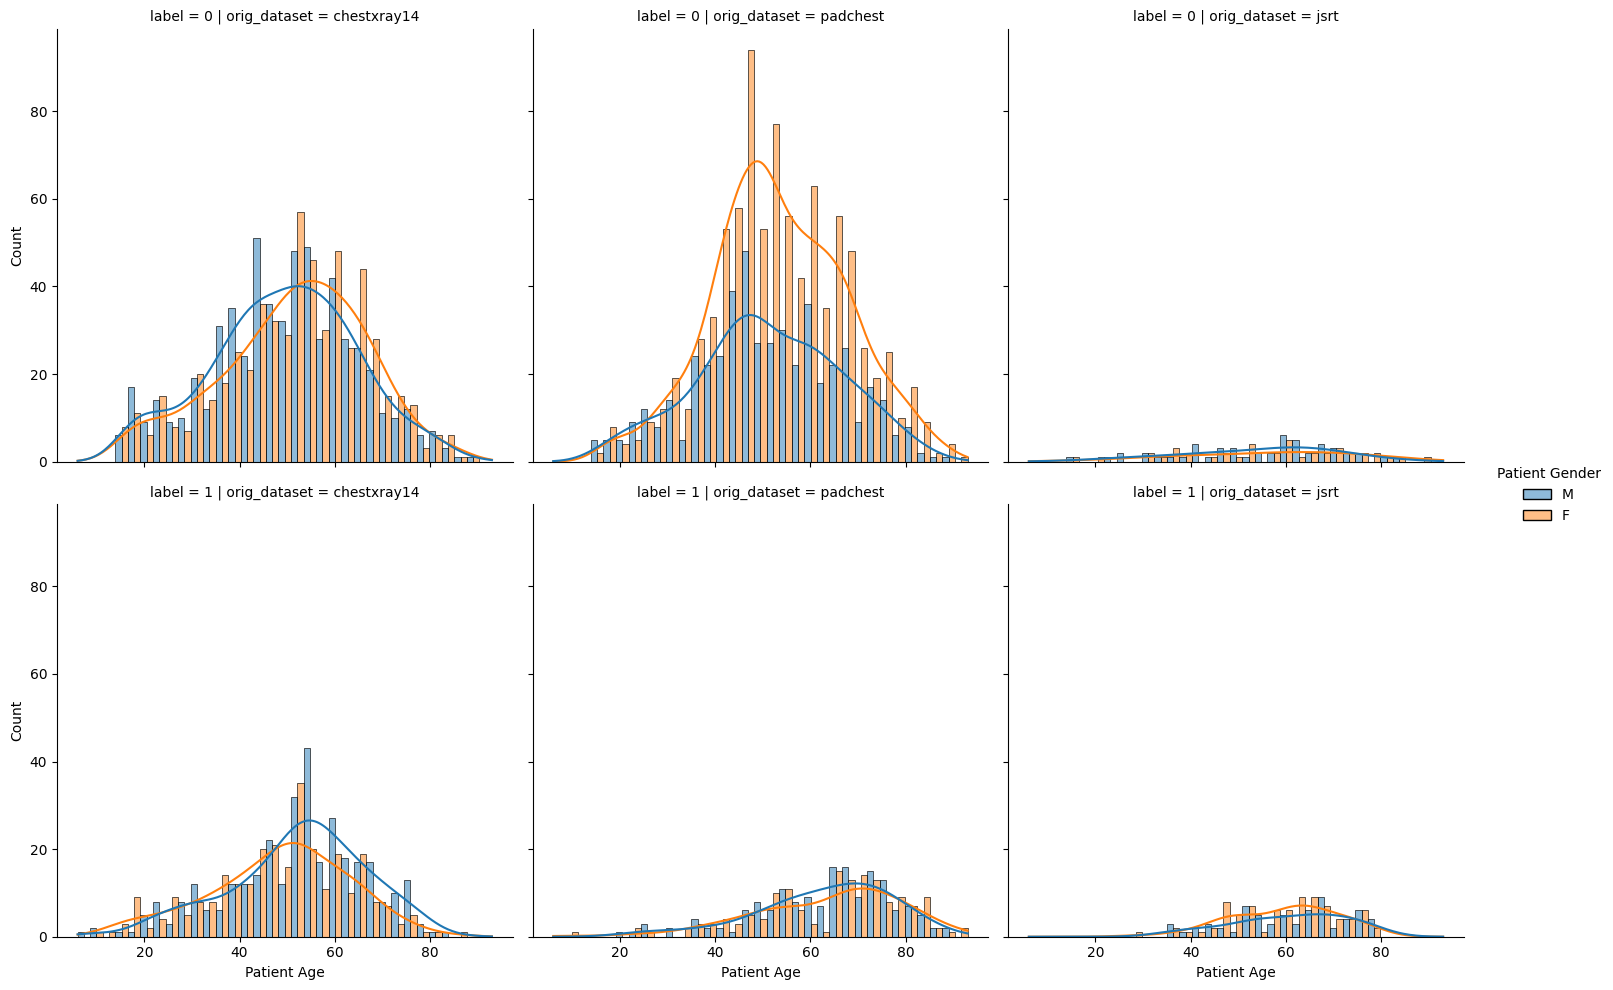

In [389]:
# multiple: 'layer', 'stack', 'fill', 'dodge'
sns.displot(data=common_meta.query("orig_dataset != 'openi'"),\
            x='Patient Age',\
            hue='Patient Gender',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',\
            row='label'
           ).savefig("../figures/data/Internal_Age_Distribution_Gender_Class.png")

From the above plot, we can see that there is an overall class imbalance towards the non-nodule class. Of this class, the *PadChest* dataset contains the most samples, interestingly with nearly double the *Female* cases compared to *Male* across the age distribution. *ChestXray14* closely follows in size, however with a nearly equal distribution between *Patient Genders*. Both datasets have a normal distribution in the positive class, with padchest peaking at age 48, while CXR14 peaks slightly later at 53. *JSRT* contains magnitudes fewer samples in both classes, however there are slightly more positive samples than negative, with both peaking around the age of 63. 

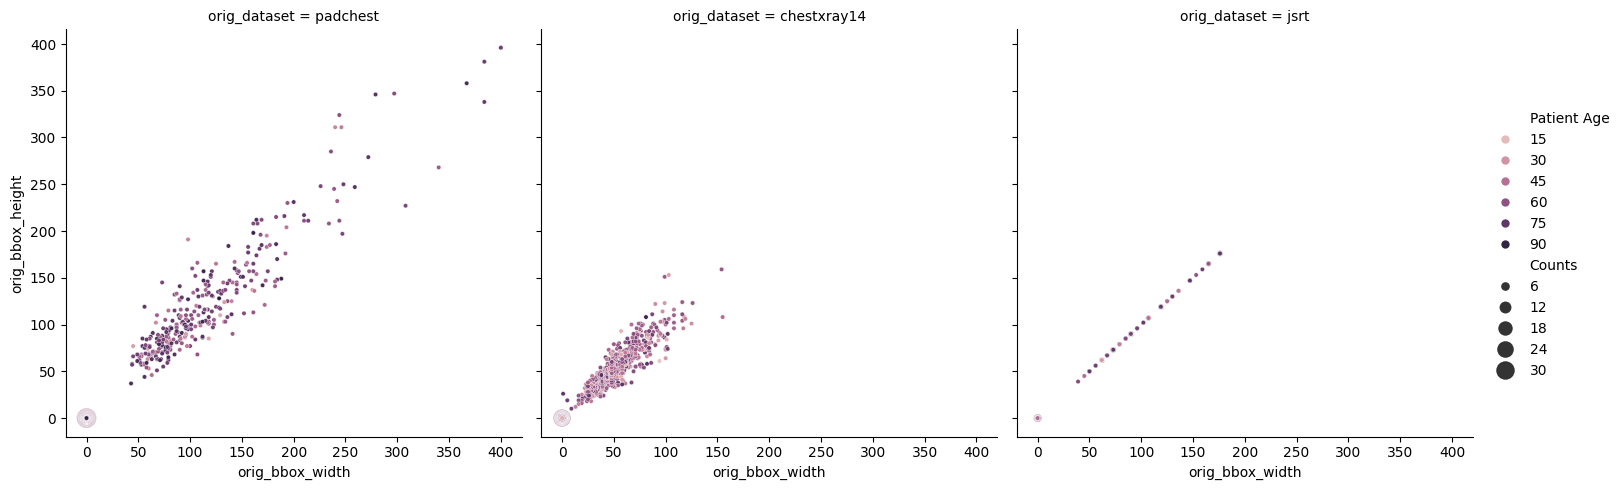

In [390]:
sns.relplot(
    data=common_meta.query("orig_dataset != 'openi'")[["orig_bbox_width","orig_bbox_height",'orig_dataset','Patient Age','Patient Gender']].value_counts().to_frame("Counts").reset_index(), \
    x="orig_bbox_width", y="orig_bbox_height",
    col="orig_dataset", hue="Patient Age", size="Counts",sizes=(10,200),# row="PatientSex",
    # col="PatientSex", style="Manufacturer", hue="PatientSex", 
    kind="scatter"
).savefig("../figures/data/Internal_BBox_Age.png")


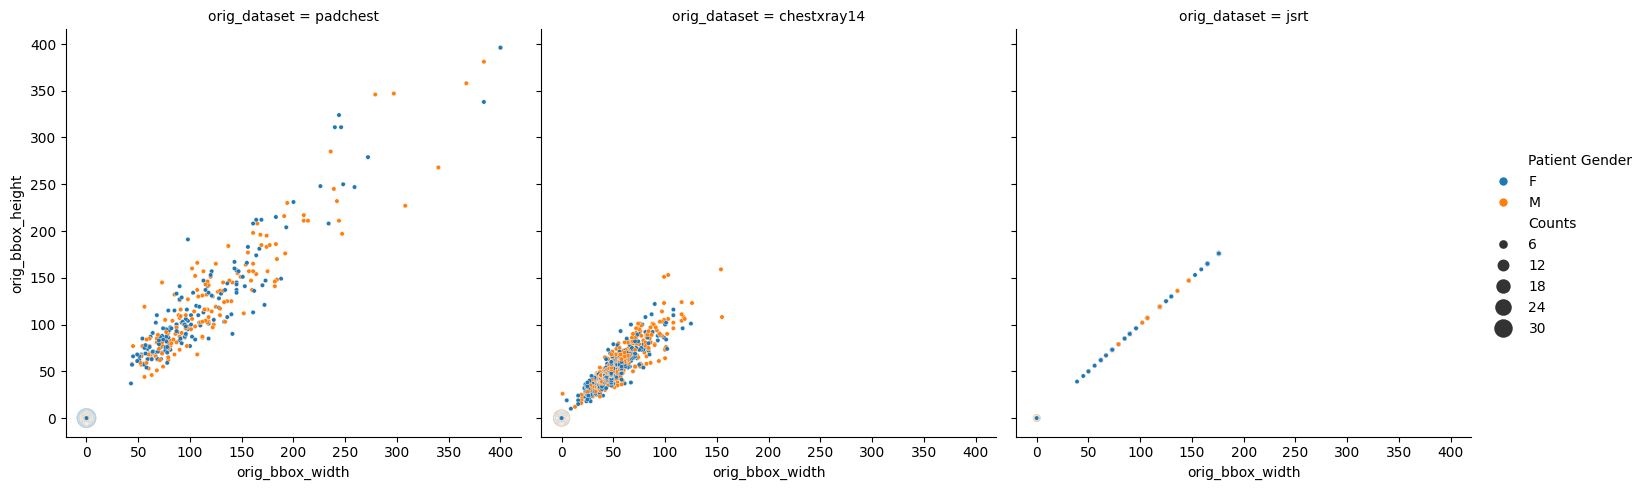

In [391]:
sns.relplot(
    data=common_meta.query("orig_dataset != 'openi'")[["orig_bbox_width","orig_bbox_height",'orig_dataset','Patient Age','Patient Gender']].value_counts().to_frame("Counts").reset_index(), \
    x="orig_bbox_width", y="orig_bbox_height",
    col="orig_dataset", hue="Patient Gender", size="Counts",sizes=(10,200),# row="PatientSex",
    # col="PatientSex", style="Manufacturer", hue="PatientSex", 
    kind="scatter"
).savefig("../figures/data/Internal_BBox_Gender.png")


Across both gender and age, there does not appear to be any bias regarding nodule bounding box size on *PadChest* and *CXR14*. Both are relatively evenly dispersed. Note that a large number of images can be seen at (0,0), as all non-nodule images are given this coordinate. *JSRT* also has a relatively evenly dispersed age range, however there is a cluster of *Male* bounding box sizes, between 90 and 150mm, while *Female* boxes range from around 50 to 200mm.

## Reviewing NaNs
Before stratifying the data, need to investigate any NaNs present in columns. 

In [392]:
full_meta

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44.0,M,2992.0,2991.0,...,776,538,92,94,NaN,NaN,NaN,NaN,NaN,NaN
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46.0,F,2500.0,2048.0,...,215,641,27,40,NaN,NaN,NaN,NaN,NaN,NaN
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47.0,M,2048.0,2500.0,...,695,342,155,108,NaN,NaN,NaN,NaN,NaN,NaN
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48.0,F,2021.0,2021.0,...,319,447,72,75,NaN,NaN,NaN,NaN,NaN,NaN
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55.0,M,2992.0,2991.0,...,599,590,62,69,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,2103_IM-0734-0001-0001,openi,0,c3879.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4878,1142_IM-0096-1001,openi,0,c3882.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4879,171_IM-0468-1001,openi,0,c3888.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4880,246_IM-0992-1002001,openi,0,c3891.mha,normal,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
full_meta.isna().any()

original_image_name      False
orig_dataset             False
label                    False
mha                      False
Finding Labels            True
Patient ID                True
Patient Age               True
Patient Gender            True
original_image_width      True
original_image_height     True
Pneumothorax              True
Cardiomegaly              True
Nodule                   False
shared_image_width       False
shared_image_height      False
orig_bbox_x              False
orig_bbox_y              False
orig_bbox_width          False
orig_bbox_height         False
Study Year                True
Manufacturer              True
Modality                  True
subtlety                  True
nodule_size               True
malignant                 True
dtype: bool

#### Finding Labels
Negative classes have no labels. Assign "No Finding" label to negative cases.

In [394]:
# map the multiple negative names to "No Finding"
full_meta['Finding Labels'] = full_meta['Finding Labels'].apply(lambda x: "No Finding" if x=="normal" or pd.isnull(x) else x)

#### Patient ID
Certain cases (primarily in the CXR14 dataset) include positive and negative samples from a single patient. Such samples may be particularly useful for validation or fine-tuning purposes. Such samples shall be held out. Additionally, JSRT examples have no patient IDs, therefore populate with unique dummy IDs too.

In [395]:
# populate jsrt patient ids
li = np.arange(0, len(full_meta), 1).tolist()
full_meta['Patient ID'] = full_meta['Patient ID'].apply(lambda x: "J{}".format(li.pop(0)) if pd.isnull(x) else x)

##### Extracting Gold Samples

In [396]:
# grab gold rows
gold_meta = full_meta.loc[full_meta.duplicated(subset=['Patient ID'],keep=False),:]

In [397]:
len(gold_meta['Patient ID'].unique())

18

In [398]:
# remove from original df
full_meta.drop(gold_meta.index, inplace=True)

In [399]:
gold_meta.isna().any()

original_image_name      False
orig_dataset             False
label                    False
mha                      False
Finding Labels           False
Patient ID               False
Patient Age              False
Patient Gender           False
original_image_width     False
original_image_height    False
Pneumothorax              True
Cardiomegaly              True
Nodule                   False
shared_image_width       False
shared_image_height      False
orig_bbox_x              False
orig_bbox_y              False
orig_bbox_width          False
orig_bbox_height         False
Study Year                True
Manufacturer              True
Modality                  True
subtlety                  True
nodule_size               True
malignant                 True
dtype: bool

In [400]:
gold_meta = gold_meta.reset_index(drop=True)

In [401]:
# export df
gold_meta.to_csv("../data/gold_metadata.csv", index=False)

In [402]:
# !mkdir \
# /Volumes/Sophie\ H/dataset_node21/cxr_images/ExperimentData/GoldData/ \
# /Volumes/Sophie\ H/dataset_node21/cxr_images/ExperimentData/GoldData/Images \
# /Volumes/Sophie\ H/dataset_node21/cxr_images/ExperimentData/GoldData/Images/Raw \
# /Volumes/Sophie\ H/dataset_node21/cxr_images/ExperimentData/GoldData/Images/Raw/Nodule \
# /Volumes/Sophie\ H/dataset_node21/cxr_images/ExperimentData/GoldData/Images/Raw/Normal

In [403]:
# import shutil
# for i in range(len(gold_meta)):
#     if gold_meta['label'][i] ==1:
#         shutil.copyfile(\
#             "/Volumes/Sophie H/dataset_node21/cxr_images/original_data/images/{}"\
#                         .format(gold_meta['mha'][i]),\
#             "/Volumes/Sophie H/dataset_node21/cxr_images/ExperimentData/GoldData/Images/Raw/Nodule/{}"\
#                         .format(gold_meta['mha'][i]))
#     else:
#         shutil.copyfile(\
#             "/Volumes/Sophie H/dataset_node21/cxr_images/original_data/images/{}"\
#                         .format(gold_meta['mha'][i]),\
#             "/Volumes/Sophie H/dataset_node21/cxr_images/ExperimentData/GoldData/Images/Raw/Normal/{}"\
#                         .format(gold_meta['mha'][i]))

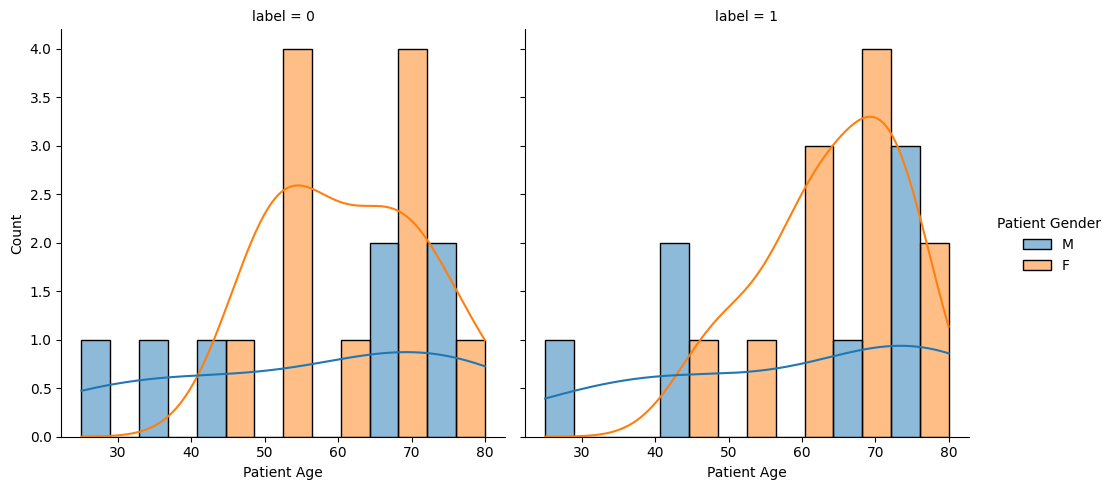

In [404]:
sns.displot(data=gold_meta,\
            x='Patient Age',\
            hue='Patient Gender',\
            kde=True,\
            multiple="dodge",\
            col='label',
           ).savefig("../figures/data/Gold_Age_Distribution_Between_Classes.png")

From the above plot, we can see the age distribution differs between classes, despite both CXRs having been taken from the same individual. This suggests that in certain cases there is a notable time difference between a patients's CXR.

##### CXR Capture Time Difference per Patient

In [405]:
gold_ages = pd.DataFrame(data=gold_meta['Patient ID'].unique(),columns=["Patient ID"])

In [406]:
gold_ages['Age 1'] = gold_ages['Patient ID'].apply(lambda x: gold_meta[\
                            gold_meta.duplicated(subset=['Patient ID'],keep='first')]\
                            .query("`Patient ID`== '{}'".format(x))['Patient Age'].values[0])
gold_ages['Age 2'] = gold_ages['Patient ID'].apply(lambda x: gold_meta[\
                            gold_meta.duplicated(subset=['Patient ID'],keep='last')]\
                            .query("`Patient ID`== '{}'".format(x))['Patient Age'].values[0])

In [407]:
gold_ages['Age Difference'] = (gold_ages['Age 1'] - gold_ages['Age 2']).abs()

In [408]:
gold_ages['Patient Gender'] = gold_ages['Patient ID'].apply(lambda x: gold_meta[\
                            gold_meta.duplicated(subset=['Patient ID'],keep='first')]\
                            .query("`Patient ID`== '{}'".format(x))['Patient Gender'].values[0])

In [409]:
gold_meta.head(1)

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant
0,00000545_009,chestxray14,1,n0990.mha,Nodule,545,42.0,M,2992.0,2991.0,...,624,228,53,48,NaN,NaN,NaN,NaN,NaN,NaN


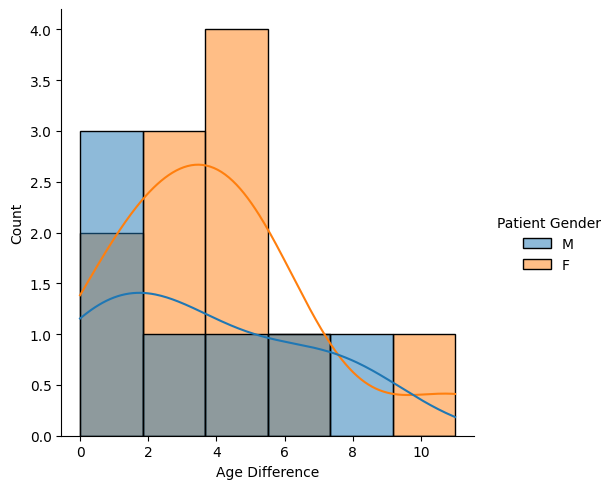

In [410]:
# !mkdir Plots
sns.displot(data=gold_ages,\
            x='Age Difference',\
            hue='Patient Gender',\
            kde=True,\
            multiple="layer", #'layer', 'stack', 'fill', 'dodge'
            # bins=11
           ).savefig("../figures/data/Gold_Age_Diff_Between_CXR_per_Patient.png")

Reviewing the age differences between CXRs, we can see that most Male CXRs fall 

#### Patient Age
Age is an important consideration in modelling dataset

In [411]:
full_meta[full_meta['Patient Age'].isna()==True].query('orig_dataset != "openi"')

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant
3677,JPCLN106,jsrt,1,n1022.mha,lung cancer,J193,NaN,M,NaN,NaN,...,193,1180,107,107,NaN,NaN,NaN,2.0,18.0,malignant
3688,JPCLN117,jsrt,1,n0307.mha,lung cancer,J204,NaN,F,NaN,NaN,...,341,1009,73,73,NaN,NaN,NaN,2.0,12.0,malignant


OpenI dataset is severely limited in metadata, and so does not include age data. Two cases in the JSRT dataset are missing Age information, which should have a insignificant impact on metrics. These can either be *excluded*, to ensure full transparency on reporting, or held out for *validation*, with age 

In [412]:
# grab exclusion rows
external_exclusions_df = full_meta.loc[full_meta['Patient Age'].isna()==True,:]

#### original_image_width/height


In [413]:
full_meta[full_meta['original_image_width'].isna()==True]['orig_dataset'].unique()

array(['jsrt', 'openi'], dtype=object)

In [414]:
full_meta[full_meta['original_image_width'].isna()==True]['label'].value_counts()

label
0    1195
1     203
Name: count, dtype: int64

Reviewing the data, it appears that the JSRT dataset is the only one which does not include the original image dimensions. Reviewing the **CXR-8** paper revealed that all images from that dataset were resized to *1024×1024 bitmap images* [(Wang *et al.* 2017)](https://arxiv.org/abs/1705.02315). This contrasts with the "original_image_width/height" values shared by Node21, and it is unclear where such values were obtained. As such, each "original" image in the Node21 dataset was manually loaded (using the OpenCXR library) and image dimensions were extracted and added as the *shared_image_width/height* cols. 
OpenI has no meta information - known as mandatory external.

In [415]:
full_meta['shared_image_area'] = full_meta['shared_image_width']*full_meta['shared_image_height']

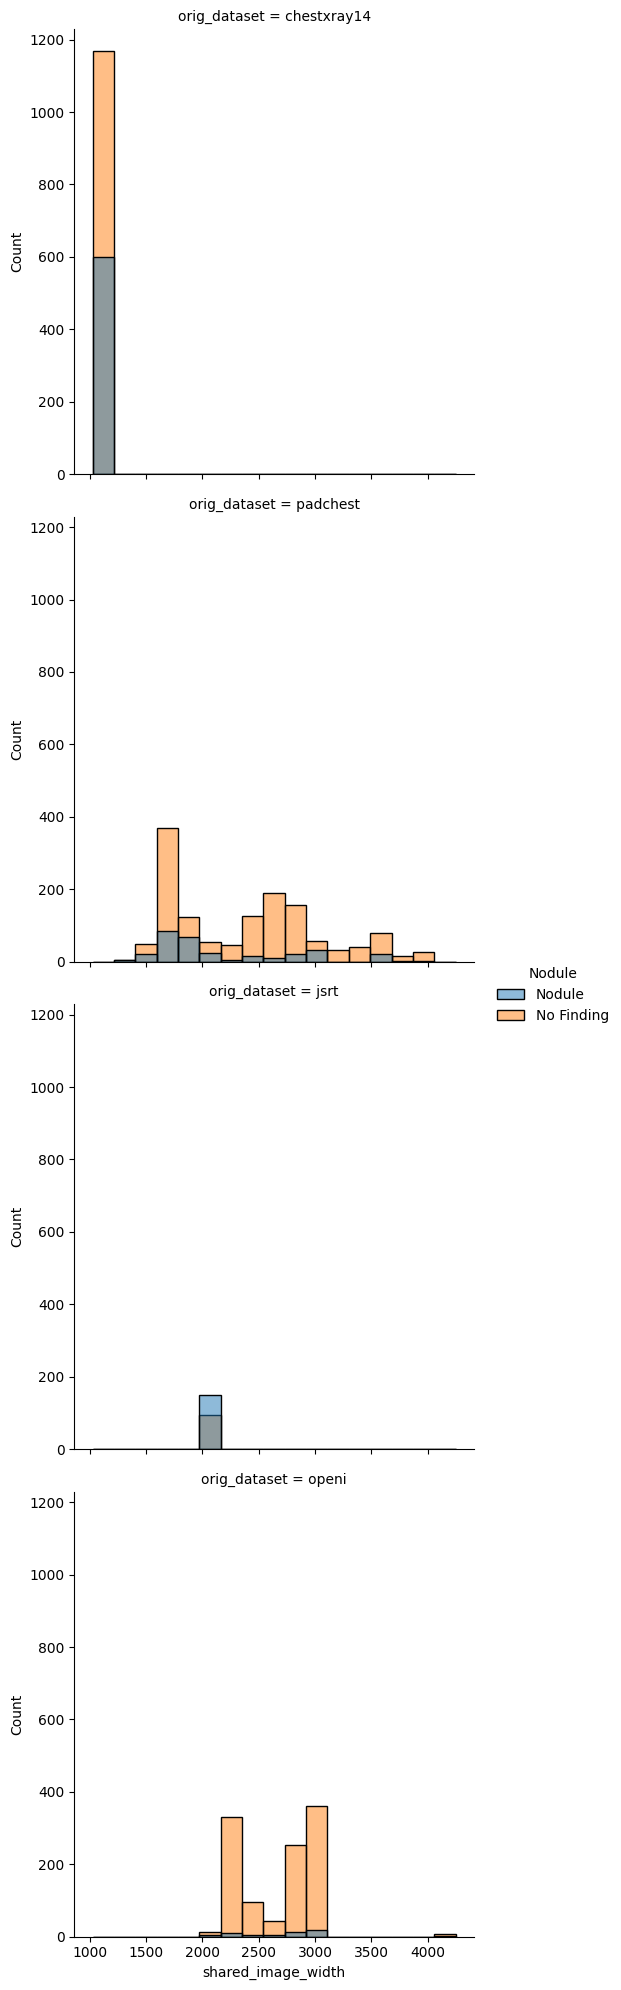

In [416]:
sns.displot(data=full_meta, \
            x='shared_image_width', #x='shared_image_area',\
            hue='Nodule',row='orig_dataset')

Reviewing the shared distributions, it's indicated that both the *jsrt* and *CXR14* datasets have been resized, as all samples are a consistent resolution. In contrast, *PadChest* is likely to have been shared with original dimensions, as the resolution ranges from widths between 1300 - 4000. Similarly, OpenI contains images ranging from 2000 and 3200. Care should be taken to ensure the resolutions across this dataset are stratified when sampling for training, test and validation.

## Pneumothorax/Cardiomegaly

In [417]:
full_meta[full_meta['Pneumothorax'].isna()==True]['orig_dataset'].value_counts()

orig_dataset
padchest    1678
openi       1156
jsrt         242
Name: count, dtype: int64

In [418]:
full_meta[full_meta['Cardiomegaly'].isna()==True]['orig_dataset'].value_counts()

orig_dataset
padchest    1678
openi       1156
jsrt         242
Name: count, dtype: int64

These headings are unique additional indicators of disease only present in the CXR-14 dataset. 

In [419]:
full_meta.query("`Finding Labels`.str.contains('pneumothorax')")

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_y,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant,shared_image_area
1818,216840111366964013402131755672012187140737715_...,padchest,1,n0356.mha,pneumothorax|nodule,76842369831064781900094649932326007946,42.0,M,2987.0,2972.0,...,2129,125,165,2012.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,8877364
1848,216840111366964013334747595492012095132940528_...,padchest,1,n0166.mha,pneumothorax|nodule,35415118532478777474501761550923556535,61.0,F,2805.0,3000.0,...,669,244,324,2012.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,8415000
1882,216840111366964013686042548532013197164111937_...,padchest,1,n0131.mha,pneumothorax|nodule,227109169010128433454862602449204842745,67.0,F,2803.0,2984.0,...,1589,156,183,2013.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,8364152
1897,216840111366964013590140476722013044115219084_...,padchest,1,n1073.mha,pneumothorax|nodule,18498314418839459390961989974087332862,80.0,M,3000.0,2994.0,...,1078,183,186,2013.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,8982000
2037,216840111366964013829543166512013318175507336_...,padchest,1,n0251.mha,nodule|pneumothorax,203997188454049584699008404094157833348,76.0,M,2764.0,3000.0,...,1160,184,170,2013.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,8292000


In [420]:
full_meta.query("`Finding Labels`.str.contains('cardiomegaly')")

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_y,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant,shared_image_area
1813,216840111366964012948363412702011024142906276_...,padchest,1,n0870.mha,cardiomegaly|nodule,306494555066687702529220145701768661052,63.0,M,2000.0,1636.0,...,489,60,68,2011.0,ImagingDynamicsCompanyLtd,CR,NaN,NaN,NaN,3272000
1817,143017709468319501772997901482020520995_u3pt37,padchest,1,n0908.mha,multiple nodules|adenopathy|cardiomegaly|super...,107134011542916376008216968840540197376,66.0,M,3724.0,3640.0,...,1623,308,227,2015.0,ImagingDynamicsCompanyLtd,CR,NaN,NaN,NaN,13555360
1833,216840111366964013076187734852011263140323244_...,padchest,1,n0609.mha,callus rib fracture| nodule|vertebral fracture...,137897379441599768064553240028739592239,77.0,F,1896.0,1292.0,...,616,54,85,2011.0,ImagingDynamicsCompanyLtd,CR,NaN,NaN,NaN,2449632
1851,57689621977024693748648832766382888122_26l7wi,padchest,1,n0564.mha,nodule|cardiomegaly|calcified densities,314376222284303250972559545224810065754,70.0,F,1760.0,2140.0,...,1424,85,115,2015.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,3766400
1856,216840111366964012989926673512011091133352245_...,padchest,1,n0830.mha,cardiomegaly| descendent aortic elongation|nodule,320448264240308519931540294204570349907,83.0,F,1896.0,1528.0,...,853,128,118,2011.0,ImagingDynamicsCompanyLtd,CR,NaN,NaN,NaN,2897088
1867,216840111366964013307756408102012066115027957_...,padchest,1,n1090.mha,nodule|aortic elongation|cardiomegaly,333761088553278640088062917453124535629,75.0,F,1724.0,1488.0,...,480,121,131,2012.0,ImagingDynamicsCompanyLtd,CR,NaN,NaN,NaN,2565312
1904,216840111366964013829543166512013329130746280_...,padchest,1,n0949.mha,cardiomegaly|vertebral degenerative changes|co...,292160129985348651058670566781111680344,75.0,F,2415.0,2505.0,...,1099,120,153,2013.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,6049575
1939,320620912494657778581041050896877698753_wfjqvw,padchest,1,n0428.mha,descendent aortic elongation|nodule|cardiomega...,150527423143282649754216449165287545295,69.0,M,2140.0,1760.0,...,282,96,96,2015.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,3766400
1941,216840111366964013590140476722013045153114707_...,padchest,1,n0791.mha,kyphosis| vertebral anterior compression|cardi...,54970688319699925802789720127112207887,74.0,F,4280.0,3520.0,...,1612,384,338,2013.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,15065600
1951,216840111366964013829543166512013360142510844_...,padchest,1,n0221.mha,hypoexpansion|cardiomegaly|nodule,256094702576599107966821252644705607126,86.0,M,2972.0,2509.0,...,1241,112,103,2013.0,PhilipsMedicalSystems,CR,NaN,NaN,NaN,7456748


Padchest includes some finding labels which fall into the two categories, and may be extracted to be included

### Reviewing BBox Positions
For our contrastive approach, we want to train (at least in the early stages) on CXRs with lung nodules only present in one lung. This creates an easier learning environment, as the approximate ground truth - the healthy, opposing lung - has fewer opportunites to learn non-pathological indicators from. 



In [421]:
full_meta.Nodule.value_counts()

Nodule
No Finding    3730
Nodule        1116
Name: count, dtype: int64

In [422]:
full_meta.columns

Index(['original_image_name', 'orig_dataset', 'label', 'mha', 'Finding Labels',
       'Patient ID', 'Patient Age', 'Patient Gender', 'original_image_width',
       'original_image_height', 'Pneumothorax', 'Cardiomegaly', 'Nodule',
       'shared_image_width', 'shared_image_height', 'orig_bbox_x',
       'orig_bbox_y', 'orig_bbox_width', 'orig_bbox_height', 'Study Year',
       'Manufacturer', 'Modality', 'subtlety', 'nodule_size', 'malignant',
       'shared_image_area'],
      dtype='object')

In [423]:
data_meta_df

,Unnamed: 0,height,img_name,label,width,x,y
0,0,94,n0239.mha,1,92,776,538
1,1,40,n0342.mha,1,27,215,641
2,2,108,n0996.mha,1,155,695,342
3,3,75,n0418.mha,1,72,319,447
4,4,69,n0538.mha,1,62,599,590
...,...,...,...,...,...,...,...
5219,5219,0,c3879.mha,0,0,0,0
5220,5220,0,c3882.mha,0,0,0,0
5221,5221,0,c3888.mha,0,0,0,0
5222,5222,0,c3891.mha,0,0,0,0


In [445]:
bbox_vis_df = full_meta[['mha','Nodule','Patient Gender','Patient Age','orig_dataset','original_image_width','original_image_height',\
           'orig_bbox_x', 'orig_bbox_y', 'orig_bbox_width', 'orig_bbox_height','shared_image_width', 'shared_image_height']]

In [446]:
bbox_vis_df.head()

,mha,Nodule,Patient Gender,Patient Age,orig_dataset,original_image_width,original_image_height,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,shared_image_width,shared_image_height
0,n0239.mha,Nodule,M,44.0,chestxray14,2992.0,2991.0,776,538,92,94,1024,1024
1,n0342.mha,Nodule,F,46.0,chestxray14,2500.0,2048.0,215,641,27,40,1024,1024
2,n0996.mha,Nodule,M,47.0,chestxray14,2048.0,2500.0,695,342,155,108,1024,1024
3,n0418.mha,Nodule,F,48.0,chestxray14,2021.0,2021.0,319,447,72,75,1024,1024
4,n0538.mha,Nodule,M,55.0,chestxray14,2992.0,2991.0,599,590,62,69,1024,1024


In [428]:
from PIL import ImageFile

In [296]:
# ImPar=ImageFile.Parser()
# with open(r"/Volumes/Sophie H/dataset_node21/cxr_images/original_data/images/n0029.mha", "rb") as f:
#     ImPar=ImageFile.Parser()
#     chunk = f.read(2048)
#     count=2048
#     while chunk != "":
#         ImPar.feed(chunk)
#         if ImPar.image:
#             break
#         chunk = f.read(2048)
#         count+=2048
#     print(ImPar.image.size)
#     print(count)

KeyboardInterrupt: 

In [443]:
bbox_vis_df[bbox_vis_df['original_image_width'].isna()]

,mha,Nodule,Patient Gender,Patient Age,orig_dataset,original_image_width,original_image_height,orig_bbox_x,orig_bbox_y,orig_bbox_width,orig_bbox_height,bbox_area,image_area
3484,c3179.mha,No Finding,F,30.0,jsrt,NaN,NaN,0,0,0,0,0,NaN
3485,c0129.mha,No Finding,M,62.0,jsrt,NaN,NaN,0,0,0,0,0,NaN
3486,c2621.mha,No Finding,F,70.0,jsrt,NaN,NaN,0,0,0,0,0,NaN
3487,c1205.mha,No Finding,M,52.0,jsrt,NaN,NaN,0,0,0,0,0,NaN
3488,c1328.mha,No Finding,M,25.0,jsrt,NaN,NaN,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,c3879.mha,No Finding,NaN,NaN,openi,NaN,NaN,0,0,0,0,0,NaN
4878,c3882.mha,No Finding,NaN,NaN,openi,NaN,NaN,0,0,0,0,0,NaN
4879,c3888.mha,No Finding,NaN,NaN,openi,NaN,NaN,0,0,0,0,0,NaN
4880,c3891.mha,No Finding,NaN,NaN,openi,NaN,NaN,0,0,0,0,0,NaN


In [447]:
bbox_vis_df['bbox_area'] = bbox_vis_df['orig_bbox_width']* bbox_vis_df['orig_bbox_height']
bbox_vis_df['image_area'] = bbox_vis_df['original_image_width']* bbox_vis_df['original_image_height']
bbox_vis_df['shared_image_area'] = bbox_vis_df['shared_image_width']* bbox_vis_df['shared_image_height']

/var/folders/yd/8wk426s903d51rjcnsq8316c0000gn/T/ipykernel_45959/3102183742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbox_vis_df['bbox_area'] = bbox_vis_df['orig_bbox_width']* bbox_vis_df['orig_bbox_height']
/var/folders/yd/8wk426s903d51rjcnsq8316c0000gn/T/ipykernel_45959/3102183742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbox_vis_df['image_area'] = bbox_vis_df['original_image_width']* bbox_vis_df['original_image_height']
/var/folders/yd/8wk426s903d51rjcnsq8316c0000gn/T/ipykernel_4595

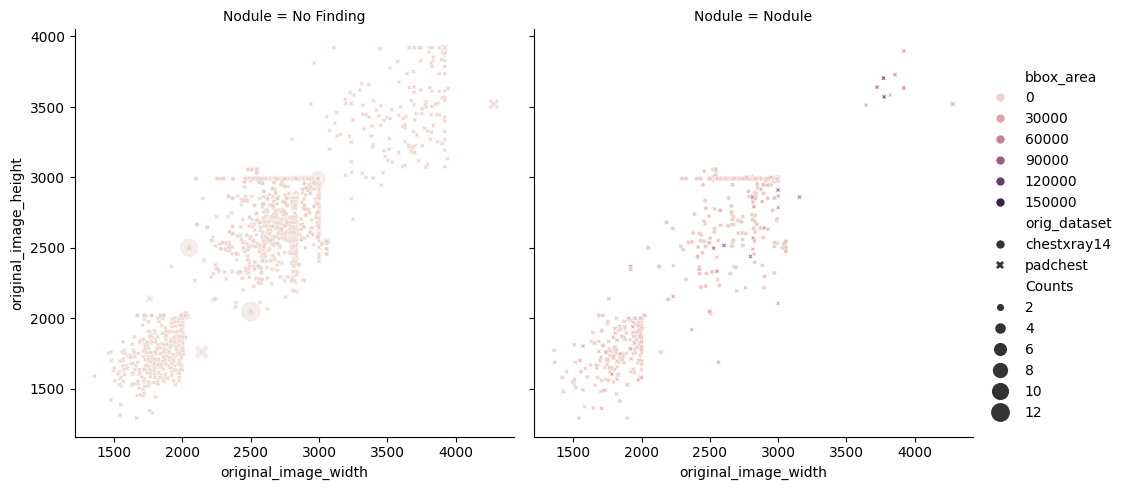

In [109]:
sns.relplot(
    data=bbox_vis_df[['original_image_height','original_image_width','image_area',"bbox_area",'orig_dataset','Nodule','Patient Age','Patient Gender']].value_counts().to_frame("Counts").reset_index(), \
    x="original_image_width", y="original_image_height",
    col="Nodule", hue="bbox_area", size="Counts",sizes=(10,200),# row="PatientSex",
    # col="PatientSex", style="Manufacturer", hue="PatientSex", 
    style="orig_dataset",
    kind="scatter",
)#.savefig("Plots/Internal_BBox_Gender.png")


In [ ]:
sns.histplot()

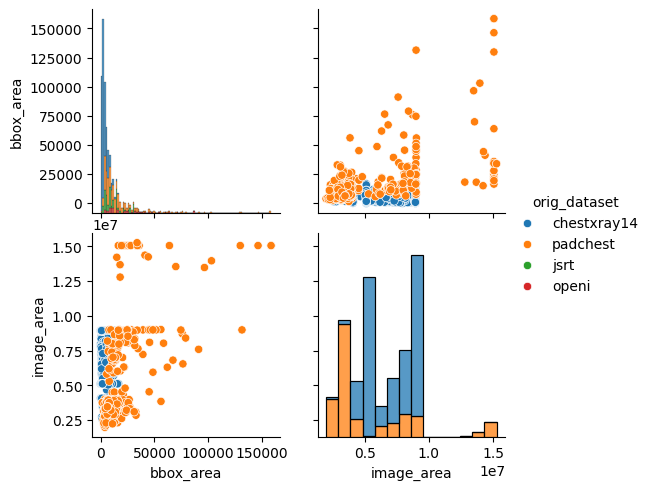

In [436]:
variables = ["bbox_area", "image_area"]
g = sns.PairGrid(bbox_vis_df.query("Nodule=='Nodule'"), hue="orig_dataset", vars=variables)
g.map_diag(sns.histplot, color=".3",multiple="stack")
g.map_offdiag(sns.scatterplot)
g.add_legend()


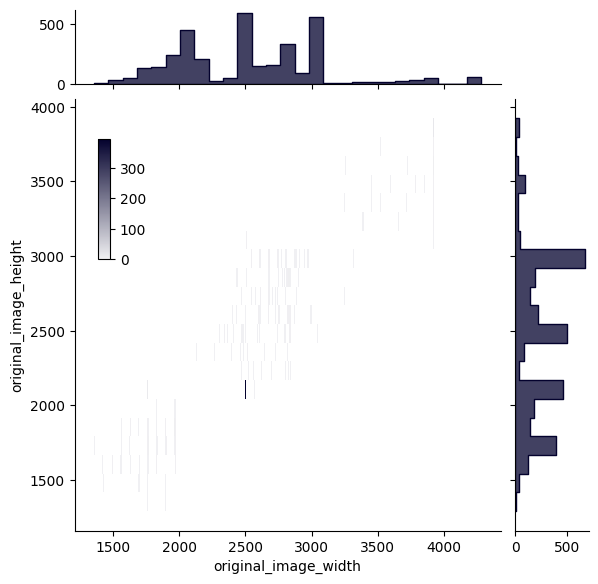

In [437]:
g = sns.JointGrid(data=bbox_vis_df, x="original_image_width", \
                  y="original_image_height", marginal_ticks=True)

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

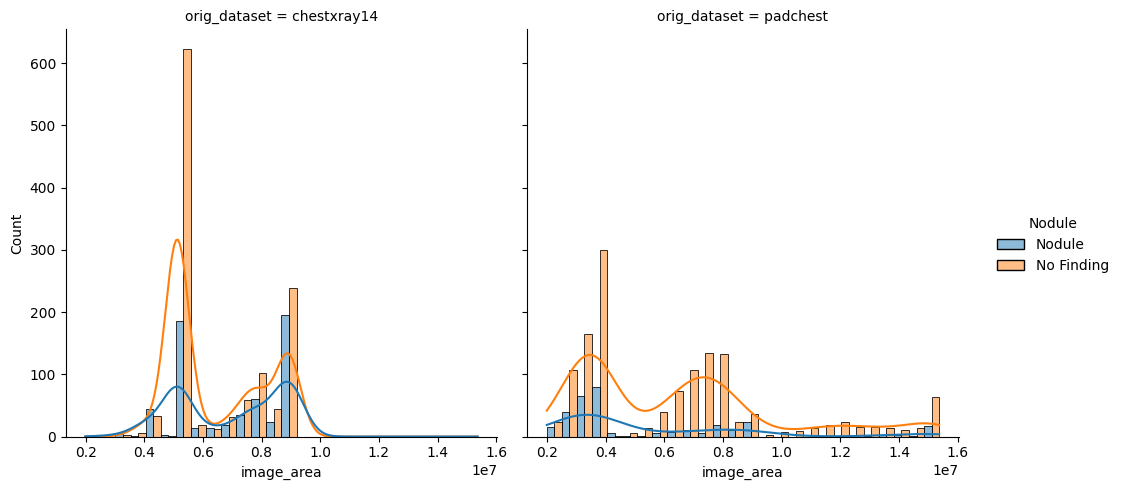

In [439]:
sns.displot(data=bbox_vis_df.query("orig_dataset in ['chestxray14','padchest']"),\
            x='image_area',\
            hue='Nodule',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',
           )#.savefig("Plots/Gold_Age_Distribution_Between_Classes.png")

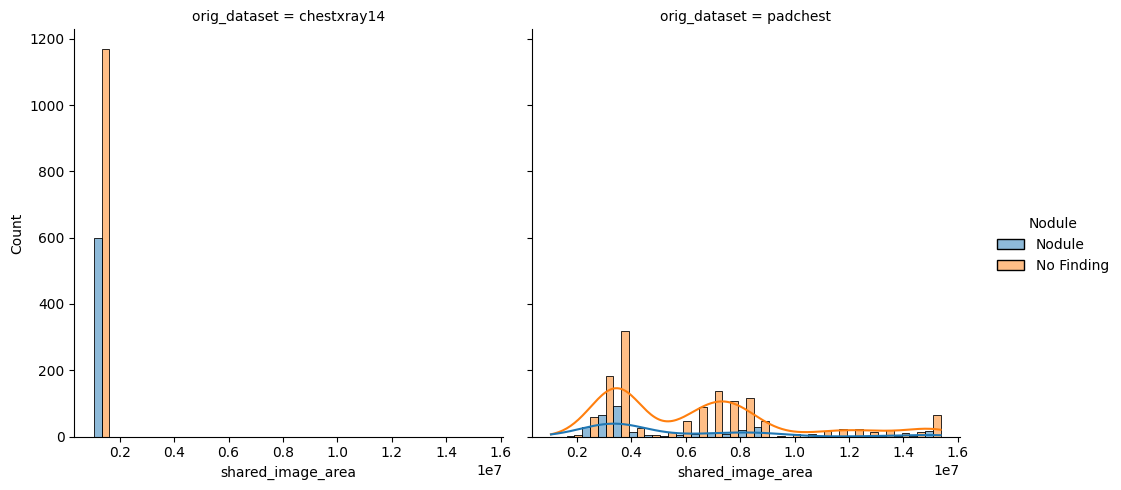

In [449]:
sns.displot(data=bbox_vis_df.query("orig_dataset in ['chestxray14','padchest']"),\
            x='shared_image_area',\
            hue='Nodule',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',
           )#.savefig("Plots/Gold_Age_Distribution_Between_Classes.png")

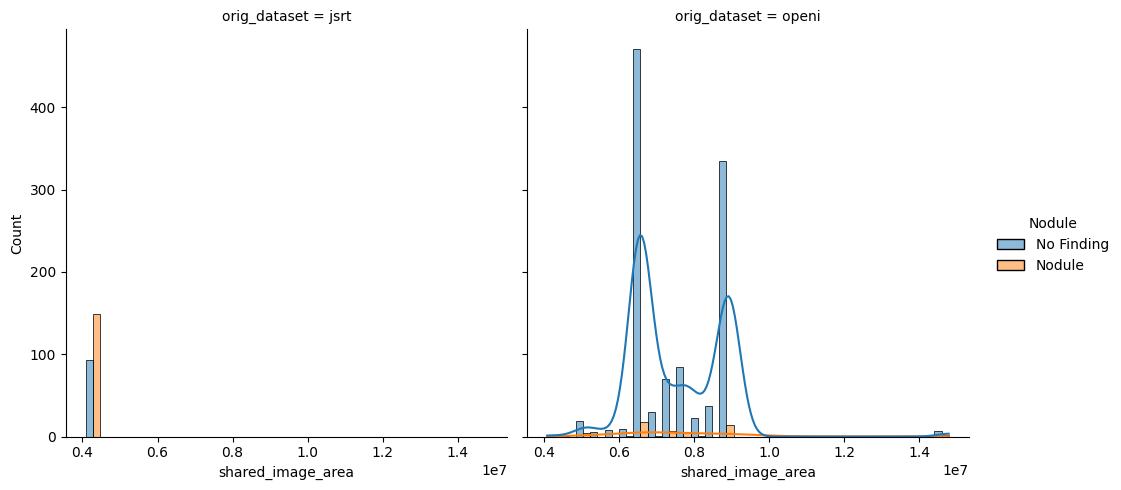

In [450]:
sns.displot(data=bbox_vis_df.query("orig_dataset not in ['chestxray14','padchest']"),\
            x='shared_image_area',\
            hue='Nodule',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',
           )#.savefig("Plots/Gold_Age_Distribution_Between_Classes.png")

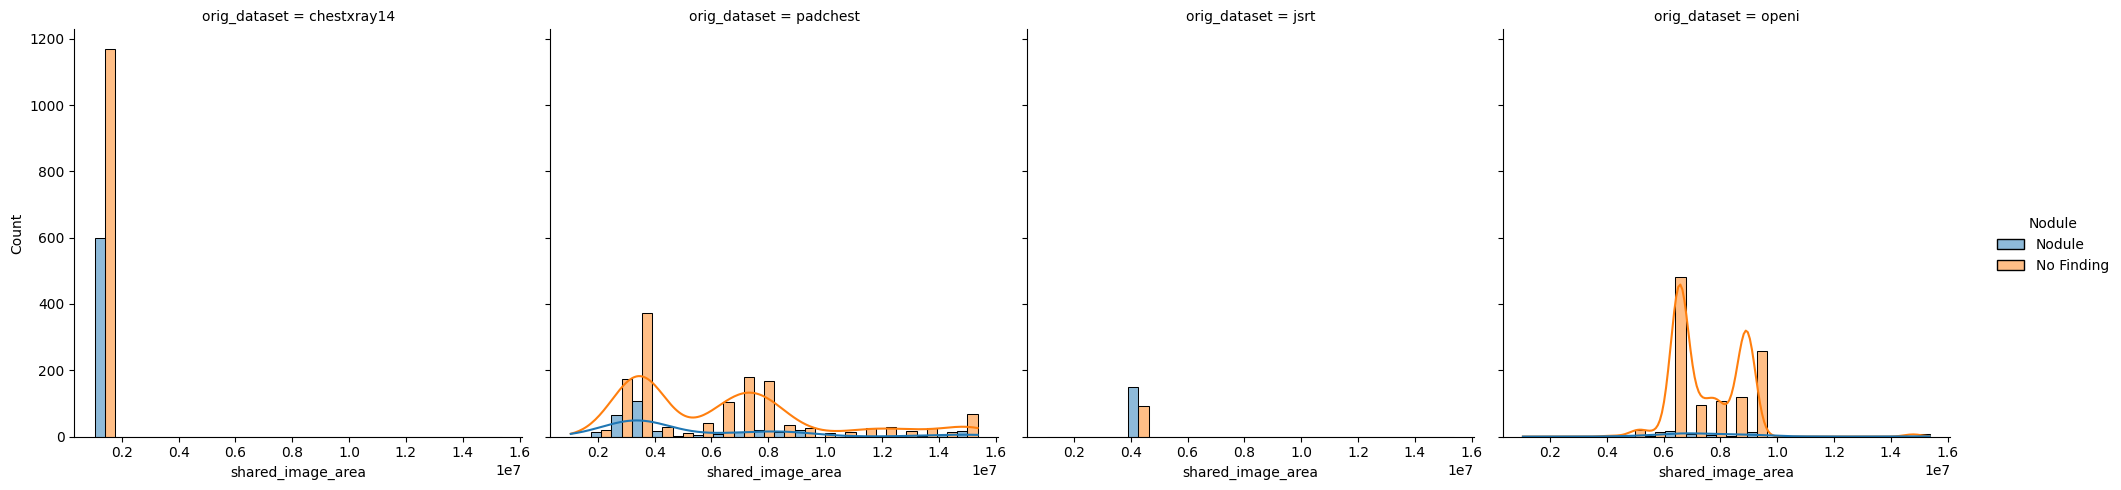

In [451]:
sns.displot(data=bbox_vis_df,\
            x='shared_image_area',\
            hue='Nodule',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',
           )#.savefig("Plots/Gold_Age_Distribution_Between_Classes.png")

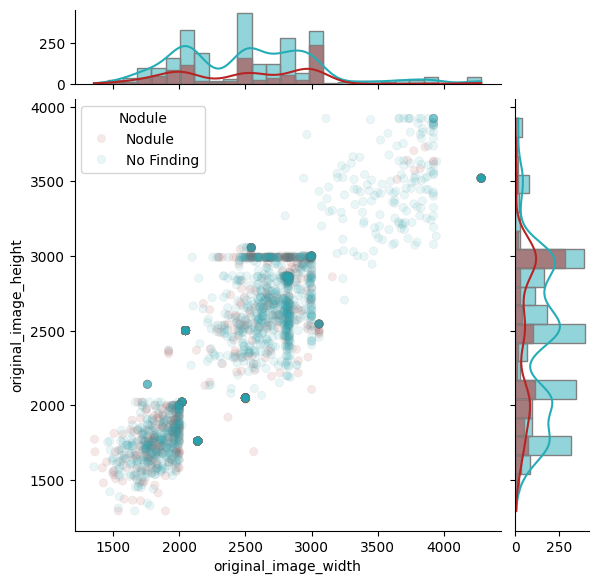

In [198]:
g = sns.JointGrid(data=bbox_vis_df, x="original_image_width", \
                  y="original_image_height", marginal_ticks=True, \
                  palette=[\
                           #'#2D0101','#01202D'],hue='Nodule')
                           '#b72424','#24acb7'],hue='Nodule')
# g.plot(sns.scatterplot, sns.histplot, alpha=.2,edgecolor=".5",color="#03012d")
g.plot_joint(sns.scatterplot, alpha=.1,edgecolor=".5")
g.plot_marginals(sns.histplot, kde=True,edgecolor=".5")

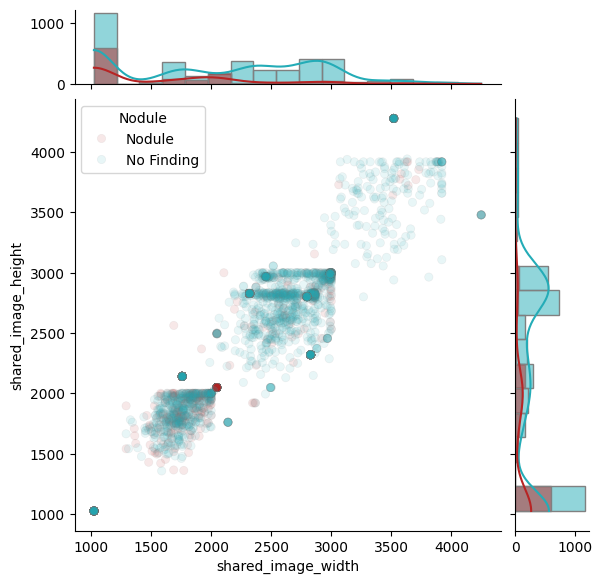

In [452]:
g = sns.JointGrid(data=bbox_vis_df, x="shared_image_width", \
                  y="shared_image_height", marginal_ticks=True, \
                  palette=[\
                           #'#2D0101','#01202D'],hue='Nodule')
                           '#b72424','#24acb7'],hue='Nodule')
# g.plot(sns.scatterplot, sns.histplot, alpha=.2,edgecolor=".5",color="#03012d")
g.plot_joint(sns.scatterplot, alpha=.1,edgecolor=".5")
g.plot_marginals(sns.histplot, kde=True,edgecolor=".5")

In [454]:
full_meta['Dim_bin'] = full_meta['shared_image_height'].apply(lambda x: "a" if x<2100 else "b" if x<3100 else "c" )

In [455]:
dim_bin_dict = {"a":"<2100","b":"<3100", "c":"3100+"}

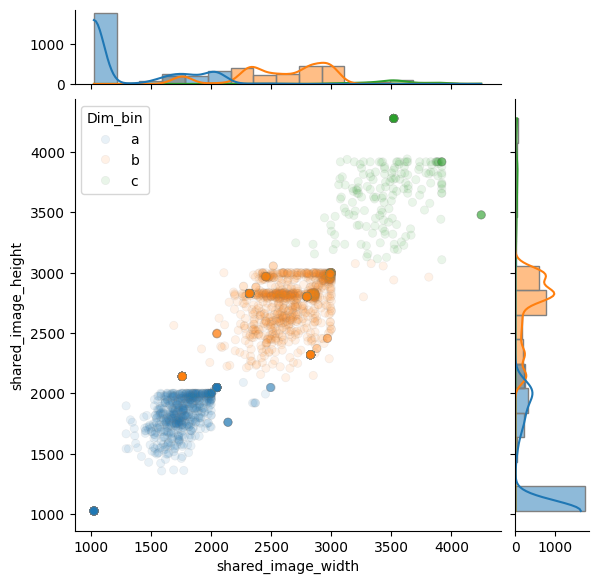

In [456]:
g = sns.JointGrid(data=full_meta, x="shared_image_width", \
                  y="shared_image_height", marginal_ticks=True, hue='Dim_bin')
# g.plot(sns.scatterplot, sns.histplot, alpha=.2,edgecolor=".5",color="#03012d")
g.plot_joint(sns.scatterplot, alpha=.1,edgecolor=".5")
g.plot_marginals(sns.histplot, kde=True,edgecolor=".5")

## Stratify

In [457]:
from sklearn.model_selection import train_test_split

In [458]:
full_meta

,original_image_name,orig_dataset,label,mha,Finding Labels,Patient ID,Patient Age,Patient Gender,original_image_width,original_image_height,...,orig_bbox_width,orig_bbox_height,Study Year,Manufacturer,Modality,subtlety,nodule_size,malignant,shared_image_area,Dim_bin
0,00010496_001,chestxray14,1,n0239.mha,Nodule,10496,44.0,M,2992.0,2991.0,...,92,94,NaN,NaN,NaN,NaN,NaN,NaN,1048576,a
1,00006281_000,chestxray14,1,n0342.mha,Nodule,6281,46.0,F,2500.0,2048.0,...,27,40,NaN,NaN,NaN,NaN,NaN,NaN,1048576,a
2,00001404_000,chestxray14,1,n0996.mha,Nodule,1404,47.0,M,2048.0,2500.0,...,155,108,NaN,NaN,NaN,NaN,NaN,NaN,1048576,a
3,00029196_000,chestxray14,1,n0418.mha,Nodule,29196,48.0,F,2021.0,2021.0,...,72,75,NaN,NaN,NaN,NaN,NaN,NaN,1048576,a
4,00014646_003,chestxray14,1,n0538.mha,Nodule,14646,55.0,M,2992.0,2991.0,...,62,69,NaN,NaN,NaN,NaN,NaN,NaN,1048576,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,2103_IM-0734-0001-0001,openi,0,c3879.mha,No Finding,J1393,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7289408,b
4878,1142_IM-0096-1001,openi,0,c3882.mha,No Finding,J1394,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8949072,b
4879,171_IM-0468-1001,openi,0,c3888.mha,No Finding,J1395,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5107712,b
4880,246_IM-0992-1002001,openi,0,c3891.mha,No Finding,J1396,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6831360,b


In [459]:
full_meta[['label','orig_dataset']].value_counts()

label  orig_dataset
0      padchest        1365
       chestxray14     1170
       openi           1102
1      chestxray14      600
       padchest         313
       jsrt             149
0      jsrt              93
1      openi             54
Name: count, dtype: int64

In [460]:
full_meta.isna().any()

original_image_name      False
orig_dataset             False
label                    False
mha                      False
Finding Labels           False
Patient ID               False
Patient Age               True
Patient Gender            True
original_image_width      True
original_image_height     True
Pneumothorax              True
Cardiomegaly              True
Nodule                   False
shared_image_width       False
shared_image_height      False
orig_bbox_x              False
orig_bbox_y              False
orig_bbox_width          False
orig_bbox_height         False
Study Year                True
Manufacturer              True
Modality                  True
subtlety                  True
nodule_size               True
malignant                 True
shared_image_area        False
Dim_bin                  False
dtype: bool

In [461]:
full_meta[['subtlety']].value_counts()

subtlety
3.0         49
4.0         37
2.0         28
1.0         25
5.0         10
Name: count, dtype: int64

In [462]:
from sklearn.model_selection import train_test_split

In [474]:
# remove from original df
full_meta.drop(external_exclusions_df.index, inplace=True)
# reset_index
external_exclusions_df = external_exclusions_df.reset_index(drop=True)

In [475]:
df_train, df_test = train_test_split(full_meta, test_size=0.3, stratify=full_meta[["orig_dataset", "label","Dim_bin"]])

In [483]:
# move excluded samples to test distribution
df_test = pd.concat([df_test,external_exclusions_df]).reset_index(drop=True)

In [1]:
df_train.query("orig_dataset in ['chestxray14','padchest','jsrt']")

NameError: name 'df_train' is not defined

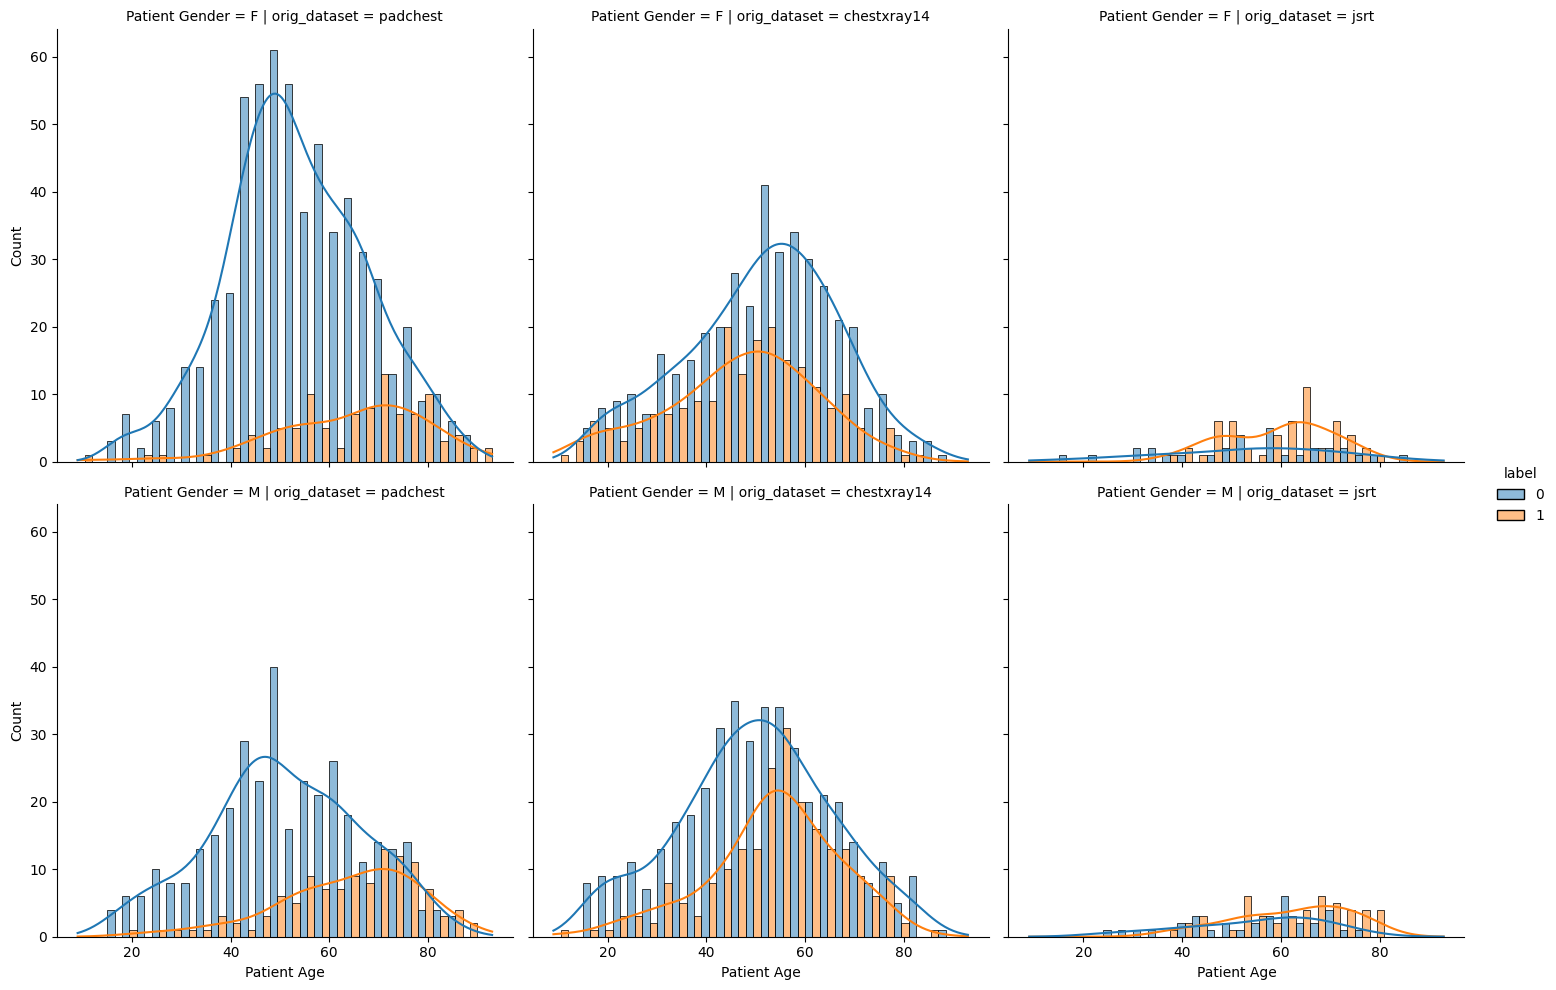

In [484]:
sns.displot(data=df_train.query("orig_dataset in ['chestxray14','padchest','jsrt']"),\
            x='Patient Age',\
            hue='label',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',
            row='Patient Gender'
           )#.savefig("Plots/Gold_Age_Distribution_Between_Classes.png")

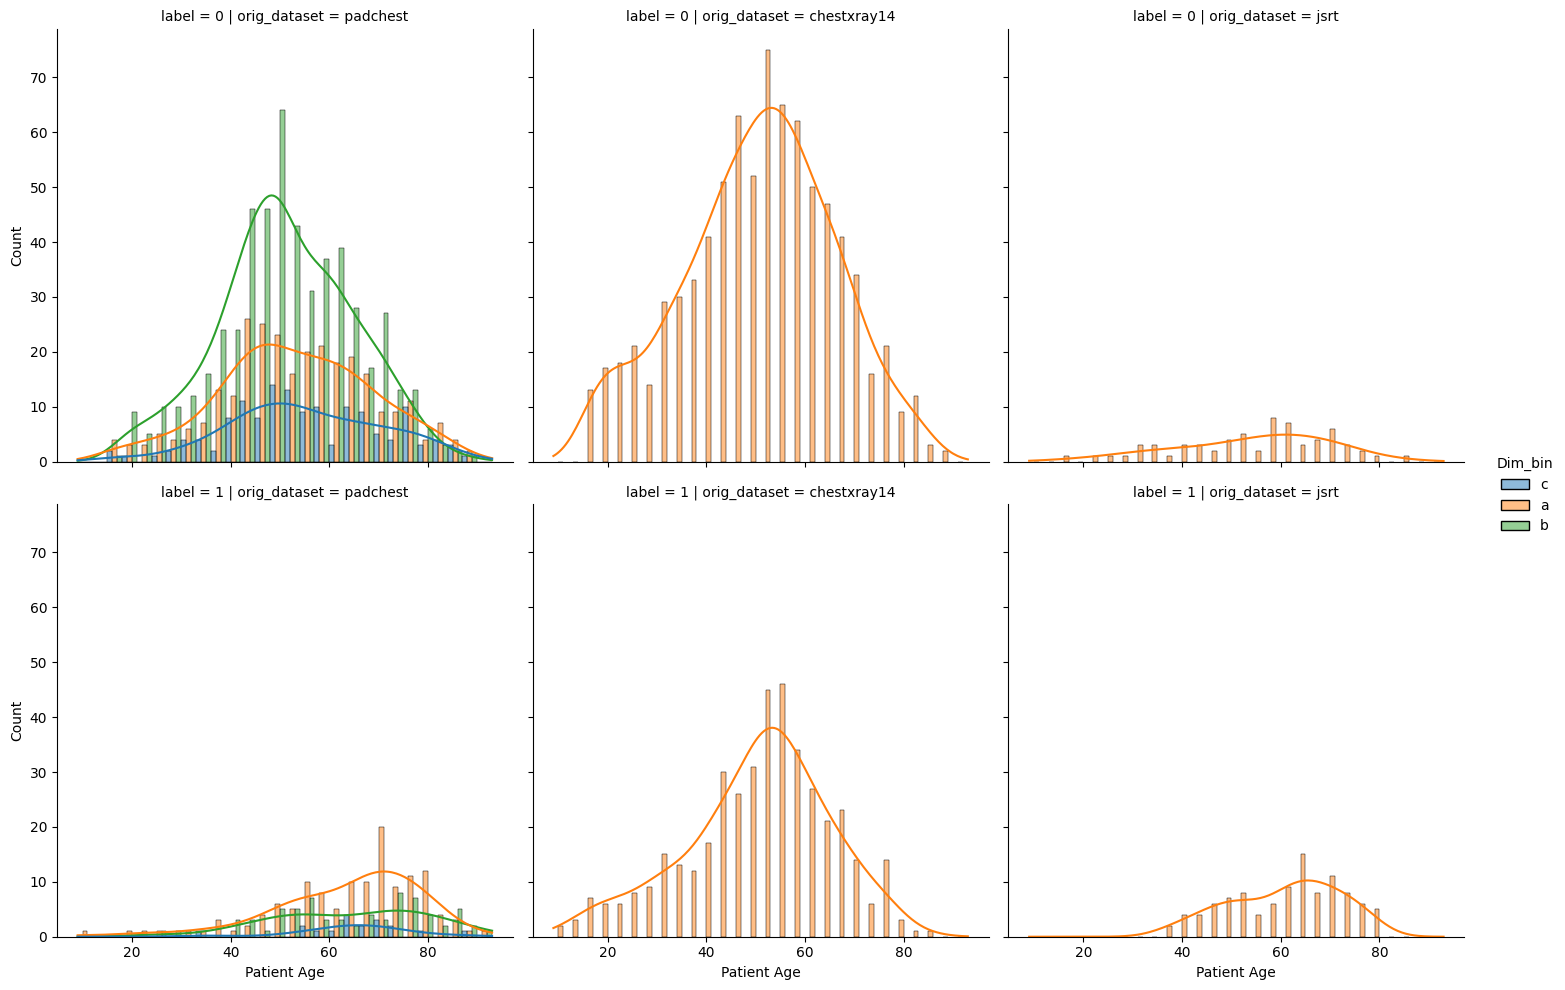

In [485]:
sns.displot(data=df_train.query("orig_dataset in ['chestxray14','padchest','jsrt']"),\
            x='Patient Age',\
            hue='Dim_bin',\
            kde=True,\
            multiple="dodge",\
            col='orig_dataset',
            row='label'
           )#.savefig("Plots/Gold_Age_Distribution_Between_Classes.png")

In [486]:
df_train.orig_dataset.value_counts()

orig_dataset
chestxray14    1239
padchest       1174
jsrt            168
Name: count, dtype: int64

In [489]:
df_train.query('orig_dataset=="jsrt"')['label'].value_counts()

label
1    103
0     65
Name: count, dtype: int64

In [490]:
df_train.query('orig_dataset=="chestxray14"')['label'].value_counts()

label
0    819
1    420
Name: count, dtype: int64

In [491]:
df_train.query('orig_dataset=="padchest"')['label'].value_counts()

label
0    955
1    219
Name: count, dtype: int64

In [492]:
df_train_cx14 = df_train.query('orig_dataset=="chestxray14"').reset_index(drop=True)
df_train_pad = df_train.query('orig_dataset=="padchest"').reset_index(drop=True)
df_train_jsrt = df_train.query('orig_dataset=="jsrt"').reset_index(drop=True)

In [493]:
df_test_cx14 = df_test.query('orig_dataset=="chestxray14"').reset_index(drop=True)
df_test_pad = df_test.query('orig_dataset=="padchest"').reset_index(drop=True)
df_test_jsrt = df_test.query('orig_dataset=="jsrt"').reset_index(drop=True)
df_test_openi = df_test.query('orig_dataset=="openi"').reset_index(drop=True)

In [495]:
df_train_cx14.to_csv("../data/cxr14/train_cx14_node_21.csv",index=False)
df_train_pad.to_csv("../data/padchest/train_pad_node_21.csv",index=False)
df_train_jsrt.to_csv("../data/jsrt/train_jsrt_node_21.csv",index=False)

In [499]:
df_train_cx14['filename'] = df_train_cx14['mha'].apply(lambda x: x[:-3]+"png")
df_train_cx14[['filename','label']].to_csv("../data/cxr14/train_cx14_node_21_labels.csv",index=False)
df_train_pad['filename'] = df_train_pad['mha'].apply(lambda x: x[:-3]+"png")
df_train_pad[['filename','label']].to_csv("../data/padchest/train_pad_node_21_labels.csv",index=False)
df_train_jsrt['filename'] = df_train_jsrt['mha'].apply(lambda x: x[:-3]+"png")
df_train_jsrt[['filename','label']].to_csv("../data/jsrt/train_jsrt_node_21_labels.csv",index=False)

In [508]:
df_test_cx14.to_csv("../data/cxr14/test_cx14_node_21.csv",index=False)
df_test_pad.to_csv("../data/padchest/test_pad_node_21.csv",index=False)
df_test_jsrt.to_csv("../data/jsrt/test_jsrt_node_21.csv",index=False)
df_test_openi.to_csv("../data/openi/test_openi_node_21.csv",index=False)

In [506]:
df_test_cx14['filename'] = df_test_cx14['mha'].apply(lambda x: x[:-3]+"png")
df_test_cx14[['filename','label']].to_csv("../data/cxr14/test_cx14_node_21_labels.csv",index=False)
df_test_pad['filename'] = df_test_pad['mha'].apply(lambda x: x[:-3]+"png")
df_test_pad[['filename','label']].to_csv("../data/padchest/test_pad_node_21_labels.csv",index=False)
df_test_jsrt['filename'] = df_test_jsrt['mha'].apply(lambda x: x[:-3]+"png")
df_test_jsrt[['filename','label']].to_csv("../data/jsrt/test_jsrt_node_21_labels.csv",index=False)
df_test_openi['filename'] = df_test_openi['mha'].apply(lambda x: x[:-3]+"png")
df_test_openi[['filename','label']].to_csv("../data/openi/test_openi_node_21_labels.csv",index=False)

In [503]:
gold_meta.to_csv("../data/gold/gold_meta.csv")
gold_meta['filename'] = gold_meta['mha'].apply(lambda x: x[:-3]+"png")
gold_meta[['filename','label']].to_csv("../data/gold/gold_labels.csv",index=False)

In [ ]:
# df_train.to_csv("/Users/sophie/Downloads/train_node_21.csv",index=False)

In [ ]:
# df_test.to_csv("/Users/sophie/Downloads/test_node_21.csv",index=False)